In [1]:
from pathlib import Path
from collections import defaultdict
from itertools import cycle
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from randomgen import RandomGenerator, Xoroshiro128
import pycorrelate as pyc

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%load_ext cython

In [2]:
from scipy.signal import savgol_filter
from scipy.stats import rv_discrete

In [3]:
from si_prefix import prefix
import exptools as et
import tcspc
import loader

In [4]:
import depi
from depi import fret
from depi import dist_distrib as dd
from depi import plotter as pl
depi.__version__

'0.1+10.gc0fa55c'

In [5]:
print([x for x in dir(depi) if not x.startswith('__')])

['_version', 'bva', 'ctmc', 'depi', 'depi_cy', 'dist_distrib', 'fret', 'load_params', 'loader', 'mem', 'plotter', 'recolor_burstsph', 'recolor_burstsph_cache', 'save_params', 'validate_params']


# Load data

## Load dataset

### AK measurement grouped by Number

## Load dataset

### E3BD measurement grouped by concentration

In [6]:
folder = Path('../Relevant PQ measurements/E3BD smFRET #2/results')
[f.name for f in folder.glob("*.csv")
 if 'merge' in f.stem]

['E3BD_GdmHCl_0.0M_merge_Donly_bursts.csv',
 'E3BD_GdmHCl_0.0M_merge_Donly_burst_photons.csv',
 'E3BD_GdmHCl_0.0M_merge_FRET_bursts.csv',
 'E3BD_GdmHCl_0.0M_merge_FRET_burst_photons.csv',
 'E3BD_GdmHCl_1.5M_merge_Donly_bursts.csv',
 'E3BD_GdmHCl_1.5M_merge_Donly_burst_photons.csv',
 'E3BD_GdmHCl_1.5M_merge_FRET_bursts.csv',
 'E3BD_GdmHCl_1.5M_merge_FRET_burst_photons.csv',
 'E3BD_GdmHCl_2.0M_merge_Donly_bursts.csv',
 'E3BD_GdmHCl_2.0M_merge_Donly_burst_photons.csv',
 'E3BD_GdmHCl_2.0M_merge_FRET_bursts.csv',
 'E3BD_GdmHCl_2.0M_merge_FRET_burst_photons.csv',
 'E3BD_GdmHCl_2.5M_merge_Donly_bursts.csv',
 'E3BD_GdmHCl_2.5M_merge_Donly_burst_photons.csv',
 'E3BD_GdmHCl_2.5M_merge_FRET_bursts.csv',
 'E3BD_GdmHCl_2.5M_merge_FRET_burst_photons.csv',
 'E3BD_GdmHCl_3.0M_merge_Donly_bursts.csv',
 'E3BD_GdmHCl_3.0M_merge_Donly_burst_photons.csv',
 'E3BD_GdmHCl_3.0M_merge_FRET_bursts.csv',
 'E3BD_GdmHCl_3.0M_merge_FRET_burst_photons.csv',
 'E3BD_GdmHCl_3.5M_merge_Donly_bursts.csv',
 'E3BD_GdmHCl_3.

In [7]:
conc = 5
name = f'concentration_{conc}M'
bursts, burstsph, meta = loader.load_burst_and_ph_data(conc, folder, pop='FRET')
burstsph['nanot'] = burstsph.nanotime * meta['nanotime_unit'] * 1e9

burstsD, burstsphD, _ = loader.load_burst_and_ph_data(conc, folder, pop='Donly')
burstsphD['nanot'] = burstsphD.nanotime * meta['nanotime_unit'] * 1e9
label = f'Concentration = {conc}M'

- Loaded photon-data "../Relevant PQ measurements/E3BD smFRET #2/results/E3BD_GdmHCl_5.0M_merge_FRET_burst_photons.csv"
../Relevant PQ measurements/E3BD smFRET #2/results/E3BD_GdmHCl_5.0M_merge_FRET_bursts.csv
- Loaded burst data "../Relevant PQ measurements/E3BD smFRET #2/results/E3BD_GdmHCl_5.0M_merge_FRET_bursts.csv"
- Loaded photon-data "../Relevant PQ measurements/E3BD smFRET #2/results/E3BD_GdmHCl_5.0M_merge_Donly_burst_photons.csv"
../Relevant PQ measurements/E3BD smFRET #2/results/E3BD_GdmHCl_5.0M_merge_Donly_bursts.csv
- Loaded burst data "../Relevant PQ measurements/E3BD smFRET #2/results/E3BD_GdmHCl_5.0M_merge_Donly_bursts.csv"


### Measurement grouped by name

In [8]:
folder = Path('../Relevant BH measurements/dsDNA/results')

In [9]:
[f.name for f in folder.glob("*.csv")
 if 'merge' in f.stem]

['d17_merge_Donly_bursts.csv',
 'd17_merge_Donly_burst_photons.csv',
 'd17_merge_FRET_bursts.csv',
 'd17_merge_FRET_burst_photons.csv',
 'd7+d17_merge_Donly_bursts.csv',
 'd7+d17_merge_Donly_burst_photons.csv',
 'd7+d17_merge_FRET_bursts.csv',
 'd7+d17_merge_FRET_burst_photons.csv',
 'd7_merge_Donly_bursts.csv',
 'd7_merge_Donly_burst_photons.csv',
 'd7_merge_FRET_bursts.csv',
 'd7_merge_FRET_burst_photons.csv']

In [10]:
name = 'd7'
#name = 'd17'
#name = 'd7+d17'
bursts, burstsph, meta = depi.loader.load_burst_and_ph_data(name, folder, pop='FRET')
burstsph['nanot'] = burstsph.nanotime * meta['nanotime_unit'] * 1e9

burstsD, burstsphD, _ = depi.loader.load_burst_and_ph_data(name, folder, pop='Donly')
burstsphD['nanot'] = burstsphD.nanotime * meta['nanotime_unit'] * 1e9
label = f'Sample {name}'

- Loaded photon-data "../Relevant BH measurements/dsDNA/results/d7_merge_FRET_burst_photons.csv"
../Relevant BH measurements/dsDNA/results/d7_merge_FRET_bursts.csv
- Loaded burst data "../Relevant BH measurements/dsDNA/results/d7_merge_FRET_bursts.csv"
- Loaded photon-data "../Relevant BH measurements/dsDNA/results/d7_merge_Donly_burst_photons.csv"
../Relevant BH measurements/dsDNA/results/d7_merge_Donly_bursts.csv
- Loaded burst data "../Relevant BH measurements/dsDNA/results/d7_merge_Donly_bursts.csv"


In [11]:
burstsph.groupby('stream').size()

stream
DexDem    26228
DexAem    37281
AexDem      767
AexAem    58932
dtype: int64

### Setup

In [12]:
ns = 1.0
nm = 1.0
time = 'ns' if ns == 1 else 's' if ns == 1e-9 else '?'
space = 'nm' if nm == 1 else 'm' if nm == 1e-9 else '?'
#ts_unit = meta['timestamp_unit']
#ts_unit = int(ts_unit * 1e9) if time == 'ns' else ts_unit
#ts_unit

In [13]:
bursts.shape

(1482, 21)

In [14]:
burstsph.shape

(123208, 5)

In [15]:
print('First timestamps in seconds:')
burstsph.timestamp.iloc[:2] * 1e-9

First timestamps in seconds:


burst  ph
0      0     0.102994
       1     0.103160
Name: timestamp, dtype: float64

In [16]:
print('Last timestamps in seconds:')
burstsph.timestamp.iloc[-2:] * 1e-9

Last timestamps in seconds:


burst  ph
1481   53    2969.039465
       54    2969.039541
Name: timestamp, dtype: float64

# IRFs

In [17]:
dd_irf_fname = folder / 'IRF_DD.csv'
assert dd_irf_fname.is_file()

da_irf_fname = folder / 'IRF_DA.csv'
assert da_irf_fname.is_file()

aa_irf_fname = folder / 'IRF_AA.csv'
assert aa_irf_fname.is_file()

In [18]:
DD_decay_minbin = 1778
DD_decay_maxbin = 2585
irf = pd.read_csv(dd_irf_fname, header=None, index_col=0)
irf.index.name = 'time'
irf.columns = ['DD']
irf['DA'] = pd.read_csv(da_irf_fname, header=None, index_col=0)
irf = irf.iloc[DD_decay_minbin:DD_decay_maxbin]

irf_AA = pd.read_csv(aa_irf_fname, header=None, index_col=0)
irf_AA.index.name = 'time'
irf_AA.columns = ['AA']
#irf = irf.iloc[DD_decay_minbin:DD_decay_maxbin]

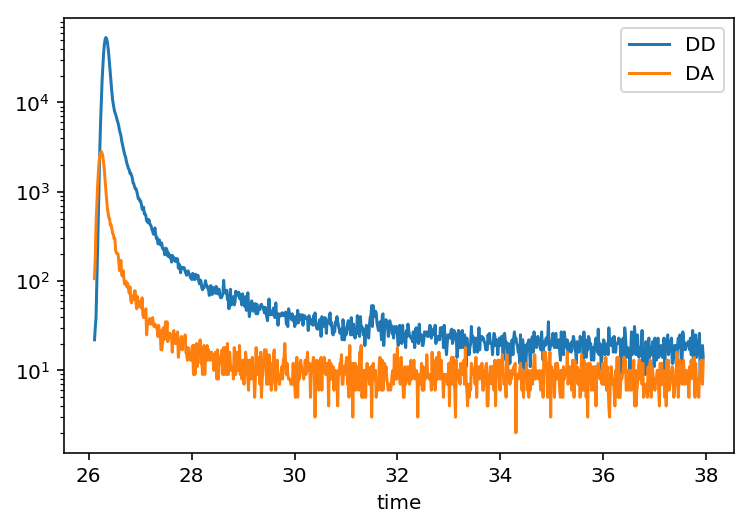

In [19]:
irf.plot()
plt.yscale('log')

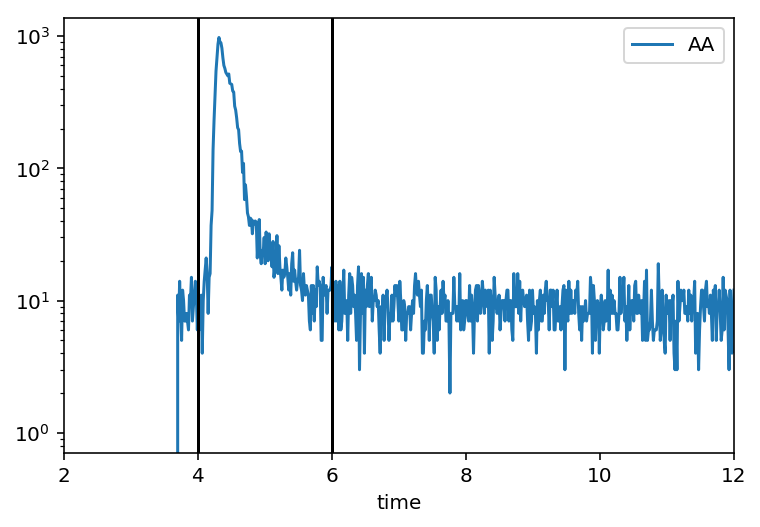

In [20]:
irf_AA.plot()
plt.yscale('log')
plt.xlim(2, 12)
plt.axvline(4, color='k')
plt.axvline(6, color='k')

In [21]:
kws = dict(window_length=9, polyorder=3, mode='nearest')
irf['DD_smooth'] = savgol_filter(irf.DD, **kws)
irf['DA_smooth'] = savgol_filter(irf.DA, **kws)
irf.loc[30:, 'DD_smooth'] = np.nan
irf.loc[28.9:, 'DA_smooth'] = np.nan
irf.iloc[:5, 2] = irf.DD.iloc[:5]

irf_AA['AA_smooth'] = savgol_filter(irf_AA.AA, **kws)
irf_AA = irf_AA.loc[4:6]

In [22]:
irf.DD_smooth.min(), irf.DA_smooth.min(), irf_AA.AA_smooth.min()

(22.0, 10.095238095238079, 6.991341991341979)

In [23]:
irf.DD_smooth -= irf.DD_smooth.min() - 1
irf.DA_smooth -= irf.DA_smooth.min() - 1
irf.head(3)

,DD,DA,DD_smooth,DA_smooth
time,,,,
26.112577,22,107,1.0,113.350649
26.127255,30,181,9.0,213.969697
26.141933,39,420,18.0,408.125541


In [24]:
irf_AA.AA_smooth -= irf_AA.AA_smooth.min() - 1
irf_AA.head(3)

,AA,AA_smooth
time,,
4.007158,11,2.813853
4.021836,6,1.346320
4.036514,7,1.000000


In [25]:
tcspc_unit = meta['nanotime_unit']
tcspc_unit

1.4678233e-11

In [26]:
irf['DD_pdf'] = irf.DD_smooth / (irf.DD_smooth.sum() * tcspc_unit * 1e9)
irf['DA_pdf'] = irf.DA_smooth / (irf.DA_smooth.sum() * tcspc_unit * 1e9)
irf_AA['AA_pdf'] = irf_AA.AA_smooth / (irf_AA.AA_smooth.sum() * tcspc_unit * 1e9)

In [27]:
irf['DD_smooth1'] = irf.DD_smooth / irf.DD_smooth.sum() 
irf['DA_smooth1'] = irf.DA_smooth / irf.DA_smooth.sum()
irf_AA['AA_smooth1'] = irf_AA.AA_smooth / irf_AA.AA_smooth.sum()

In [28]:
# Makes sure there are no negative values
for c in irf.columns:
    assert ((irf[c] > 0) | (pd.isnull(irf[c]))).all(), c

In [29]:
# Makes sure there are no negative values
for c in irf_AA.columns:
    assert ((irf_AA[c] > 0) | (pd.isnull(irf_AA[c]))).all(), c

In [30]:
(np.trapz(irf.loc[~pd.isnull(irf.DD_pdf), 'DD_pdf'].values, irf.loc[~pd.isnull(irf.DD_pdf)].index),
 np.trapz(irf.loc[~pd.isnull(irf.DA_pdf), 'DA_pdf'].values, irf.loc[~pd.isnull(irf.DA_pdf)].index),
 np.trapz(irf_AA.loc[~pd.isnull(irf_AA.AA_pdf), 'AA_pdf'].values, irf_AA.loc[~pd.isnull(irf_AA.AA_pdf)].index))

(0.9999870220572316, 0.9983776523881848, 0.9996354813768693)

/opt/conda/miniconda3/envs/py36-sys/lib/python3.6/site-packages/matplotlib/scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


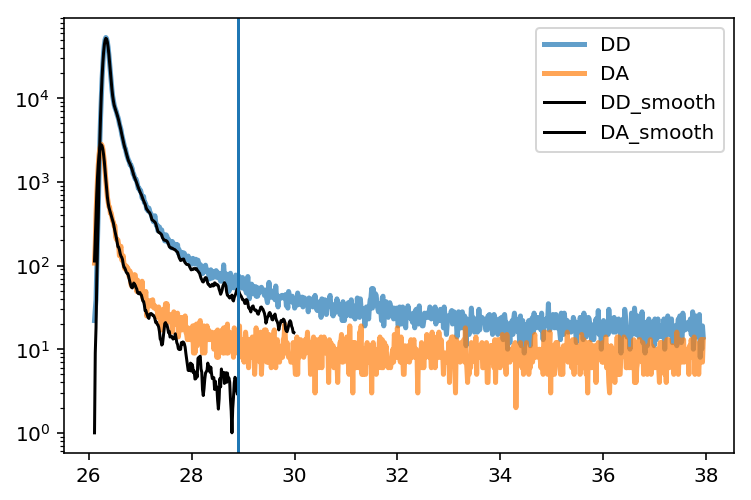

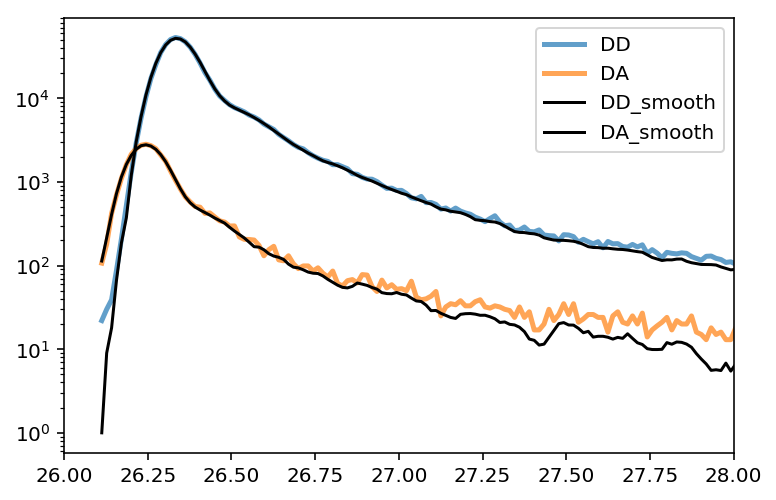

In [31]:
fig = plt.figure()
plt.semilogy(irf.DD, lw=2.5, alpha=0.7)
plt.semilogy(irf.DA, lw=2.5, alpha=0.7)
plt.semilogy(irf.DD_smooth, color='k') 
plt.semilogy(irf.DA_smooth, color='k')
plt.legend()
plt.axvline(28.9)
display(fig)
plt.xlim(26, 28);

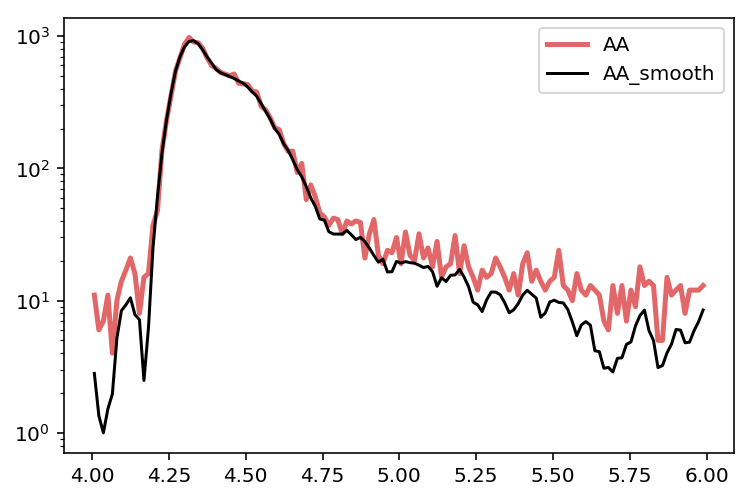

In [32]:
fig = plt.figure()
plt.semilogy(irf_AA.AA, lw=2.5, color='C3', alpha=0.7)
plt.semilogy(irf_AA.AA_smooth, color='k') 
plt.legend();

# D-only

In [33]:
thS = 0.9
thE = 0.1
selection = (burstsD.S > thS)&(burstsD.E < thE)
burstsD_sel = burstsD.loc[selection]

In [34]:
thS = 0.9
thE = 0.1
bsel = np.where((burstsD.S > thS)&(burstsD.E < thE))[0]
burstsphD_sel = burstsphD.loc[bsel]

In [35]:
assert all(burstsphD_sel.groupby('burst').size() == burstsD_sel.size_raw)

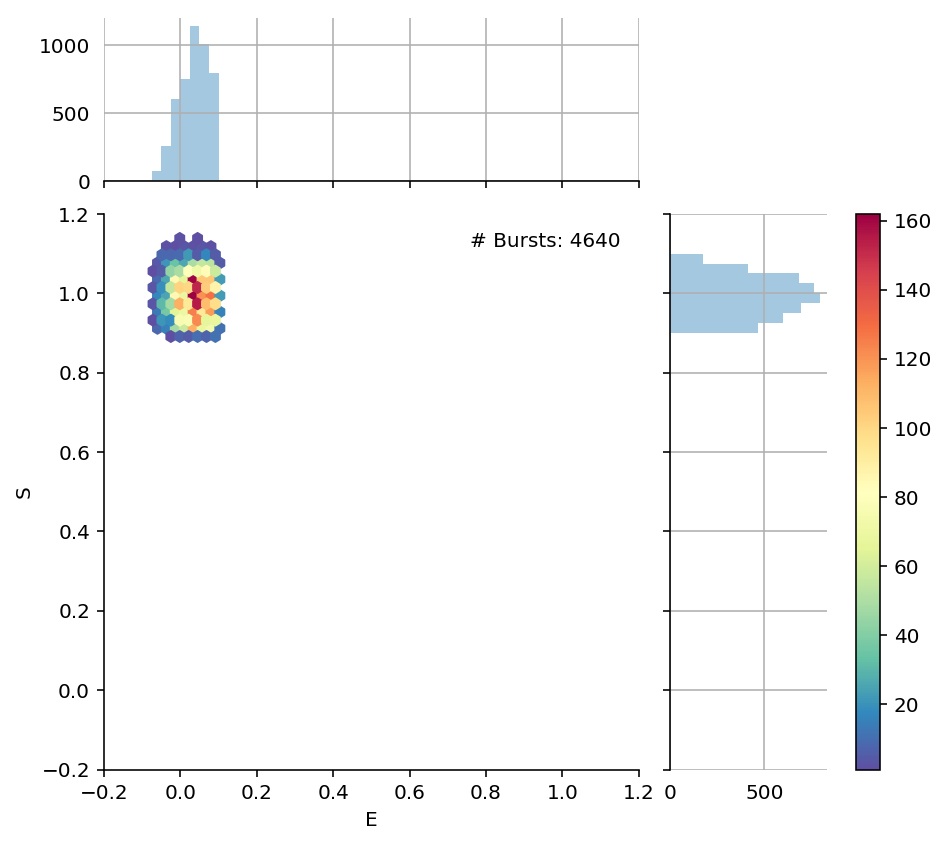

In [36]:
bins = np.arange(-0.1, 1.1, 0.025)
g = sns.JointGrid(x=burstsD_sel.E, y=burstsD_sel.S, ratio=3, space=0.2,
                  xlim=(-0.2, 1.2), ylim=(-0.2, 1.2))
g.plot_joint(plt.hexbin, mincnt=1, extent=(-0.2, 1.2, -0.2, 1.2),
             cmap='Spectral_r', gridsize=60, )
g = g.plot_marginals(sns.distplot, color="C0", bins=bins, kde=False)
g.annotate(lambda x, y: x.size, stat='# Bursts', template='{stat}: {val}', frameon=False);
pos = g.ax_joint.get_position().get_points()
X, Y = pos[:, 0], pos[:, 1]
cax = plt.axes([1., Y[0], (X[1] - X[0]) * 0.045, Y[1] - Y[0]])
g.ax_marg_x.grid(True); g.ax_marg_y.grid(True); 
plt.setp(g.ax_marg_y.get_xticklabels() , visible=True); plt.setp(g.ax_marg_x.get_yticklabels(), visible=True);
plt.colorbar(cax=cax);

0.06306084972242364

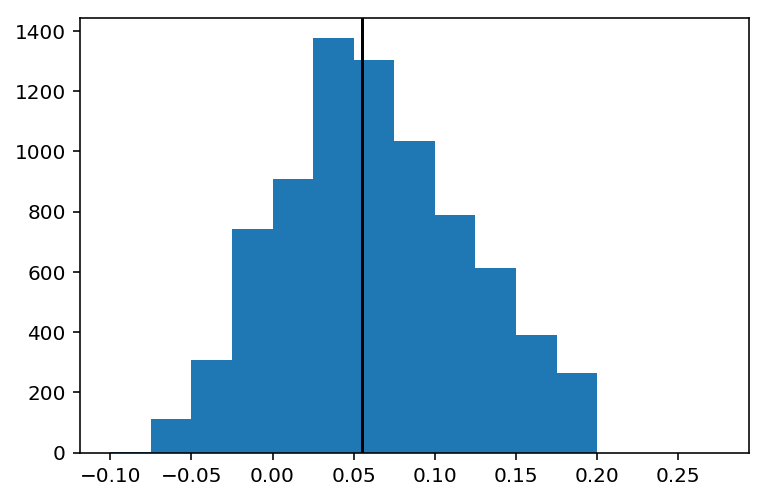

In [37]:
plt.hist(burstsD.E, bins=np.arange(-0.1, 0.3, 0.025));
plt.axvline(0.055, color='k')
# plt.axvline(np.mean(burstsD.E), color='r')
np.mean(burstsD.E)

In [38]:
nt_th = 26.1
stream_name = 'DexDem'
stream = burstsphD_sel.stream == stream_name
nanot = burstsphD_sel.nanotime.loc[stream] * meta['nanotime_unit'] * 1e9

donly_lifetime = nanot[nanot > nt_th].mean() - nt_th
donly_lifetime

4.124436567415298

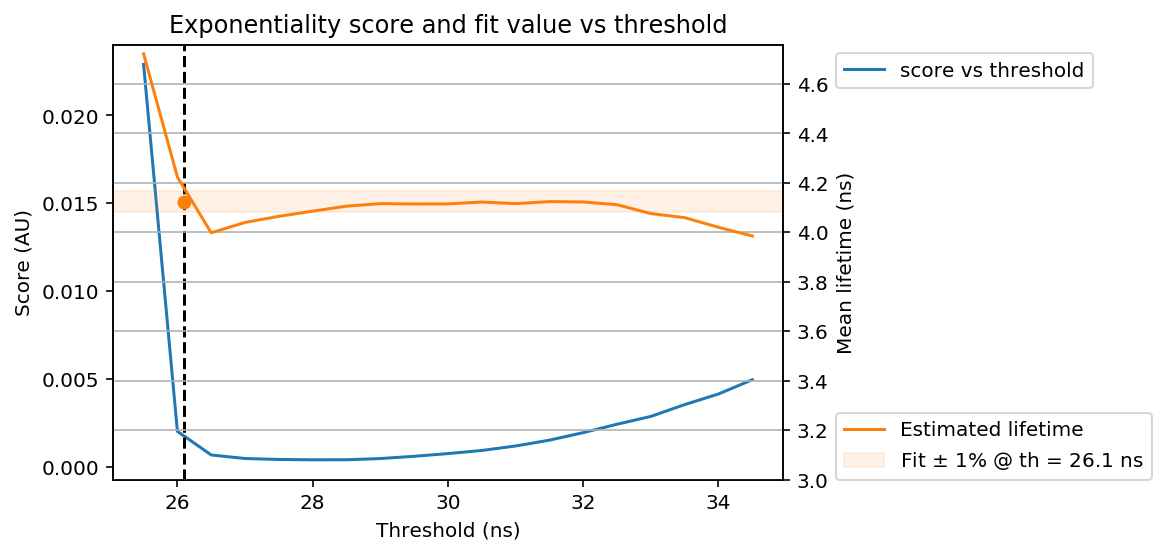

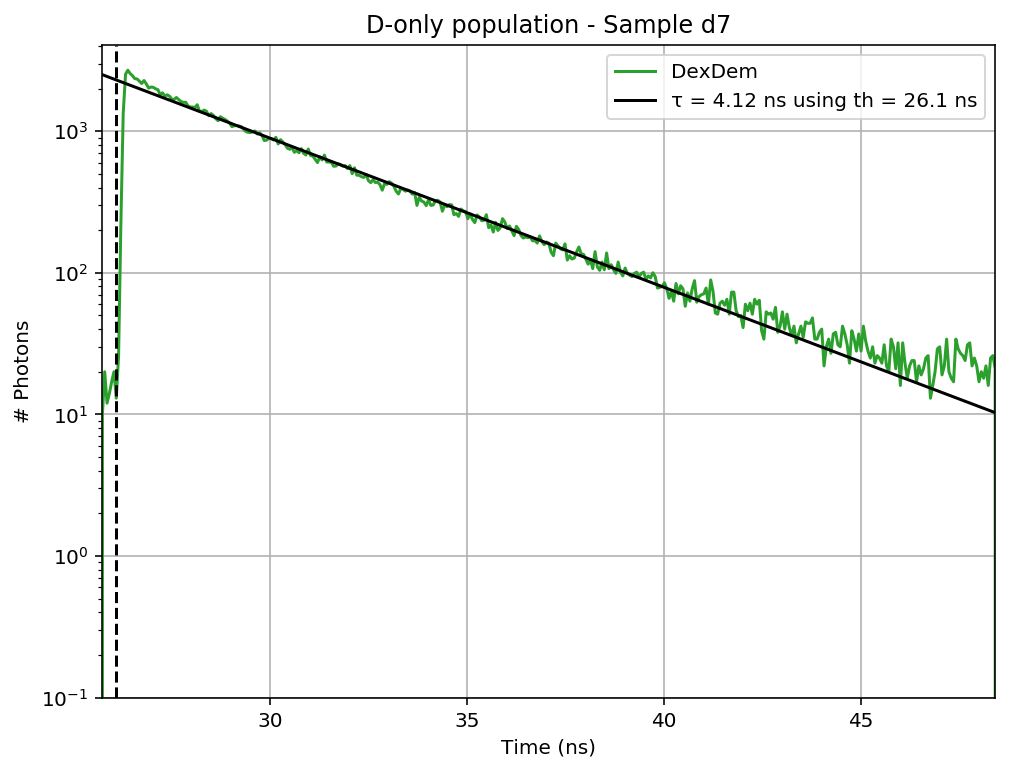

In [39]:
bins = np.arange(0, 50*1e-9/meta['nanotime_unit'], 4)
hist_params = dict(bins=bins, density=False)
nanot_hist_d, _ = np.histogram(burstsphD_sel.nanotime.loc[stream], **hist_params)
nt_th_list = np.arange(25.5, 35, 0.5)
scores, taus = et.calc_scores(burstsphD_sel.nanot.loc[stream], nt_th_list)

fig, ax = plt.subplots()
ax.plot(nt_th_list, scores, label='score vs threshold')
# ax.plot(nt_th, scores[nt_th_list == nt_th], 'ok', 
#         label=f'Score = {scores.min():.1e} @ th = {nt_th:.1f} ns')
ax.set_ylabel('Score (AU)')
ax.set_xlabel('Threshold (ns)')
ax.set_title('Exponentiality score and fit value vs threshold')
ax2 = plt.twinx()
ax2.plot(nt_th_list, taus, color='C1', label='Estimated lifetime')
ax2.plot(nt_th, donly_lifetime, 'oC1')
ax2.set_ylabel('Mean lifetime (ns)')
ax2.axhspan(donly_lifetime*0.99, donly_lifetime*1.01, color='C1', alpha=0.1,
            label=rf'Fit $\pm$ 1% @ th = {nt_th} ns')
ax2.legend(loc=(1.08, 0));
ax2.set_ylim(3)
ax.legend(loc=(1.08, 0.9));
ax.axvline(nt_th, color='k', ls='--')
ax2.grid(True)

time_axis = (bins[:-1] + 0.5*(bins[1] - bins[0]))*meta['nanotime_unit']*1e9
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(time_axis, nanot_hist_d, color='C2', label=stream_name)
ax.set_yscale('log'); ax.set_xlabel('Time (ns)'); ax.grid(True)
has_counts = np.where(nanot_hist_d > 0)[0]
ax.set_xlim(time_axis[has_counts[0]], time_axis[has_counts[-1]]);
ax.axvline(nt_th, ls='--', color='k')
ax.set_title(f'D-only population - {label}')
ax.set_ylabel('Probability' if hist_params['density'] else '# Photons');
t, y_fit = et.exp_from_hist(nanot_hist_d, bins*meta['nanotime_unit']*1e9, nt_th, donly_lifetime)
ax.plot(t, y_fit, '-k', label=f'τ = {donly_lifetime:.2f} ns using th = {nt_th} ns')
ax.set_ylim(1e-1, nanot_hist_d.max()*1.5)
ax.legend();

In [40]:
nanot_hist_d_DO = nanot_hist_d

# FRET population

## Filter `bursts` DataFrame

In [41]:
th = 25
selection = (bursts.nd + bursts.na > th) & (bursts.naa > th)
bursts_sel = bursts.loc[selection]
bursts_sel.head()

,E,S,bg_aa,bg_ad,bg_da,bg_dd,bg_period,max_rate,na,naa,...,nda,nt,size_raw,t_start,t_stop,width_ms,spot,repeat,istart,istop
burst,,,,,,,,,,,,,,,,,,,,,
0,0.900993,0.478629,3.049899,1.993348,0.373667,3.823604,0,103562.546643,38.006652,45.950101,...,-0.373667,88.133149,97,0.103192,0.107438,4.24630,0,1,0,97
3,0.815541,0.468268,6.362929,4.158672,0.779573,7.977090,0,66060.118022,70.841328,98.637071,...,-0.779573,185.501309,204,3.886852,3.895711,8.85895,0,1,210,414
4,0.804947,0.561050,3.767394,2.462287,0.461573,4.723114,0,73715.850130,46.537713,45.232606,...,0.538427,103.047206,115,3.953498,3.958743,5.24525,0,1,414,529
5,0.751427,0.548470,4.298862,2.809643,0.526688,5.389406,0,91639.154438,47.190357,51.701138,...,-0.526688,114.502090,127,5.389936,5.395921,5.98520,0,1,529,656
6,0.825775,0.512586,3.429458,2.241419,0.420170,4.299450,0,64104.946007,31.758581,36.570542,...,-0.420170,75.029674,85,7.976187,7.980961,4.77475,0,1,656,741


In [42]:
bursts_sel.width_ms.sum()

3638.9785500000007

In [43]:
burstsph.shape

(123208, 5)

## Filter `burstsph` DataFrame

In [44]:
th = 25
bsel = np.where((bursts.nd + bursts.na > th) & (bursts.naa > th))[0]
burstsph_sel = burstsph.loc[bsel]
burstsph_sel.shape

(87090, 5)

In [45]:
def bwidth(x, unit=1e-9):
    ts = x.timestamp.values
    width = (ts[-1] - ts[0]) * unit
    return width
assert all(burstsph_sel.groupby('burst').size() == bursts_sel.size_raw)
assert np.allclose(burstsph_sel.groupby('burst').apply(bwidth).sum(), 
                   bursts_sel.width_ms.sum() * 1e-3)

In [46]:
burstsph_sel.groupby('stream').size()

stream
DexDem    17507
DexAem    27033
AexDem      537
AexAem    42013
dtype: int64

## ES histograms

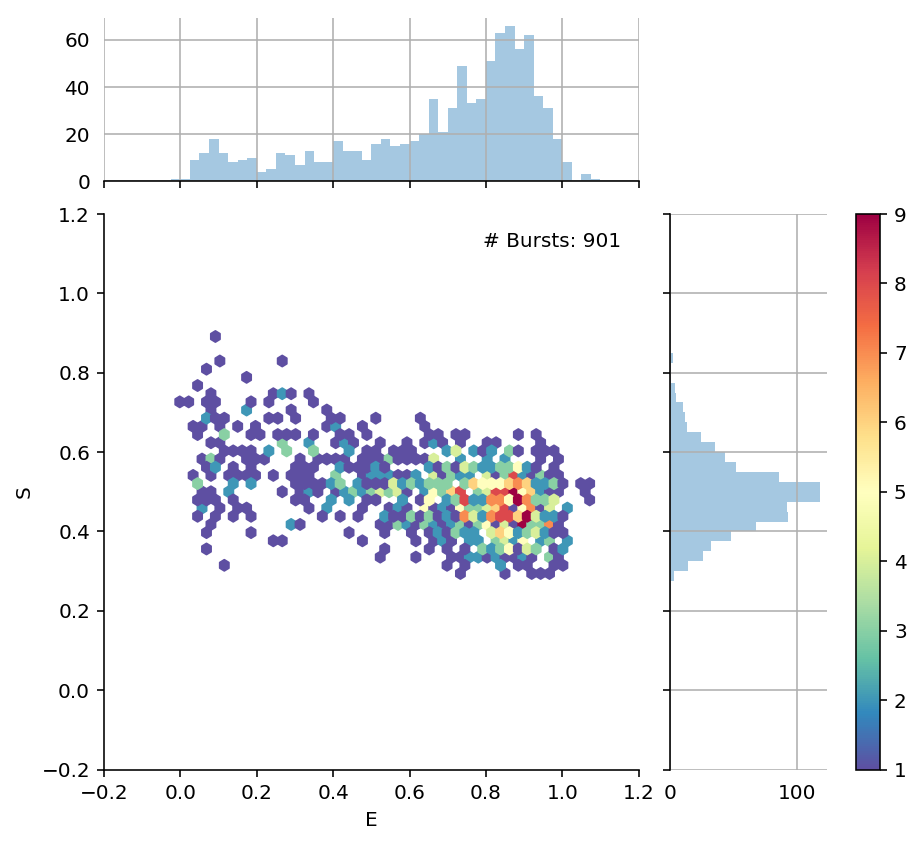

In [47]:
bins = np.arange(-0.1, 1.1, 0.025)
g = sns.JointGrid(x=bursts_sel.E, y=bursts_sel.S, ratio=3, space=0.2,
                  xlim=(-0.2, 1.2), ylim=(-0.2, 1.2))
g.plot_joint(plt.hexbin, mincnt=1, extent=(-0.2, 1.2, -0.2, 1.2),
             cmap='Spectral_r', gridsize=60, )
g = g.plot_marginals(sns.distplot, color="C0", bins=bins, kde=False)
g.annotate(lambda x, y: x.size, stat='# Bursts', template='{stat}: {val}', frameon=False);
pos = g.ax_joint.get_position().get_points()
X, Y = pos[:, 0], pos[:, 1]
cax = plt.axes([1., Y[0], (X[1] - X[0]) * 0.045, Y[1] - Y[0]])
g.ax_marg_x.grid(True); g.ax_marg_y.grid(True); 
plt.setp(g.ax_marg_y.get_xticklabels() , visible=True); plt.setp(g.ax_marg_x.get_yticklabels(), visible=True);
plt.colorbar(cax=cax);
#g.ax_marg_x.axvline(0.87)

In [48]:
E_mean = bursts_sel.E.mean()

In [49]:
E_mean

0.678418346512231

In [50]:
import fretbursts as fb

 - Optimized (cython) burst search loaded.
 - Optimized (cython) photon counting loaded.
--------------------------------------------------------------
 You are running FRETBursts (version 0.6.5+53.g50a91a5).

 If you use this software please cite the following paper:

   FRETBursts: An Open Source Toolkit for Analysis of Freely-Diffusing Single-Molecule FRET
   Ingargiola et al. (2016). http://dx.doi.org/10.1371/journal.pone.0160716 

--------------------------------------------------------------


In [51]:
fb.fretmath.correct_E_gamma_leak_dir(0.865, gamma=1, leakage=0.067, dir_ex_t=0.083)

0.8524605052701686

In [52]:
gm = 0.78
fb.fretmath.correct_S(0.34, 0.5, gamma=gm, leakage=0.067, dir_ex_t=0.083) - fb.fretmath.correct_S(0.865, 0.46, gamma=gm, leakage=0.067, dir_ex_t=0.083)

-0.0024860474382960573

In [53]:
fb.fretmath.correct_S(0.34, 0.5, gamma=gm, leakage=0.067, dir_ex_t=0.083)

0.42806747008312296

In [54]:
fb.fretmath.correct_S(0.865, 0.46, gamma=gm, leakage=0.067, dir_ex_t=0.083)

0.430553517521419

In [55]:
fb.fretmath.correct_E_gamma_leak_dir(0.34, gamma=gm, leakage=0.067, dir_ex_t=0.083)

0.3121858422364233

In [56]:
fb.fretmath.correct_E_gamma_leak_dir(0.865, gamma=gm, leakage=0.067, dir_ex_t=0.083)

0.8813635299686347

In [57]:
FRETcutoff = 0.7
bsel_low = (bursts_sel.E < FRETcutoff)
bsel_high = (bursts_sel.E > FRETcutoff)
bursts_sel_low = bursts_sel.loc[bsel_low]
bursts_sel_high = bursts_sel.loc[bsel_high]

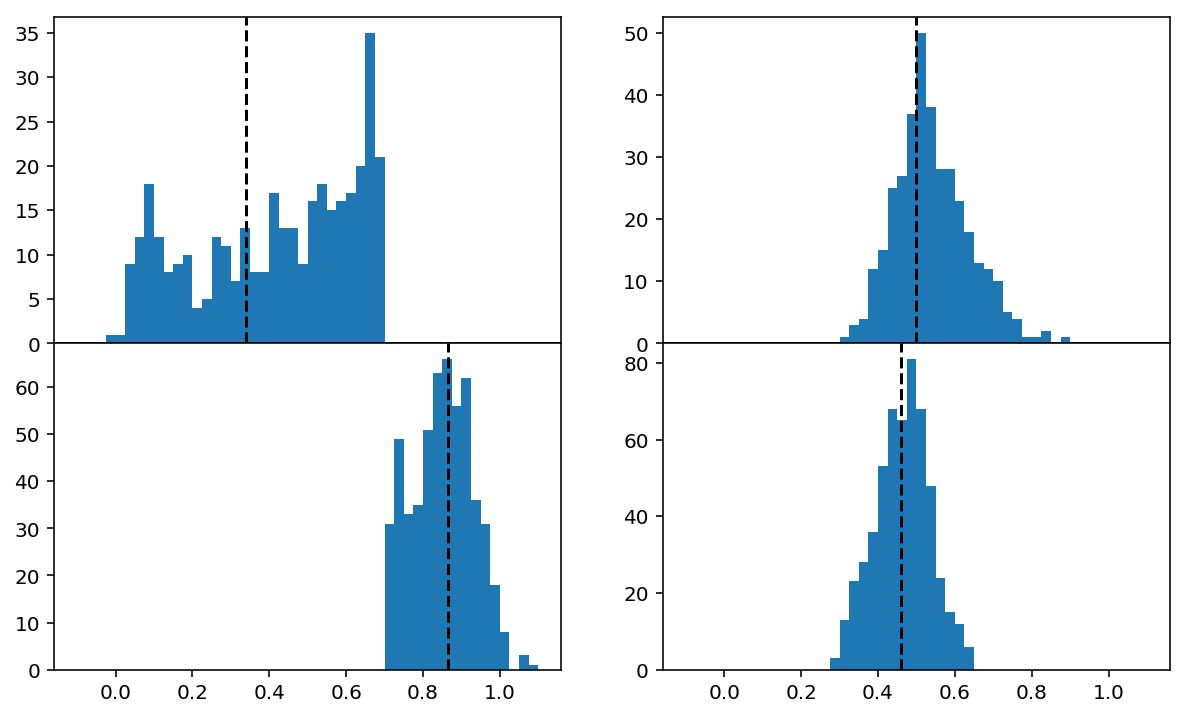

In [58]:
fig, ax = plt.subplots(2, 2, figsize=(10, 6), sharex=True)
plt.subplots_adjust(hspace=0)


ax[0,0].hist(bursts_sel_low.E, bins = np.arange(-0.1, 1.1, 0.025));
ax[0,0].axvline(0.34, ls='--', color='k');
ax[0,1].hist(bursts_sel_low.S, bins = np.arange(-0.1, 1.1, 0.025));
ax[0,1].axvline(0.5, ls='--', color='k');
ax[1,0].hist(bursts_sel_high.E, bins = np.arange(-0.1, 1.1, 0.025));
ax[1,0].axvline(0.865, ls='--', color='k');
ax[1,1].hist(bursts_sel_high.S, bins = np.arange(-0.1, 1.1, 0.025));
ax[1,1].axvline(0.46, ls='--', color='k');

## Decay histograms

In [59]:
DD = burstsph_sel.stream == 'DexDem'
DA = burstsph_sel.stream == 'DexAem'
AA = burstsph_sel.stream == 'AexAem'

In [60]:
#nt_th = 26.1 #25.2
bins = np.arange(0, 50*1e-9/meta['nanotime_unit'], 1)
nanotimes_d = burstsph_sel.nanotime.loc[DD]
nanotimes_a = burstsph_sel.nanotime.loc[DA]
nanotimes_aa = burstsph_sel.nanotime.loc[AA]
nanotimes_d_DO = burstsphD_sel.nanotime.loc[burstsphD_sel.stream == 'DexDem']

hist_params = dict(bins=bins, density=False)
nanot_hist_d, _ = np.histogram(nanotimes_d, **hist_params)
nanot_hist_a, _ = np.histogram(nanotimes_a, **hist_params)
nanot_hist_aa, _ = np.histogram(nanotimes_aa, **hist_params)
nanot_hist_d_DO, _ = np.histogram(nanotimes_d_DO, **hist_params)

In [61]:
offset_DD = tcspc.decay_hist_offset(nanotimes_d_DO, tcspc_unit, 4095) * 1e9
# this is noisier, it require 4x binning for a monothonic slope
offset_AA = tcspc.decay_hist_offset(nanotimes_aa, tcspc_unit, 4095, rebin=4) * 1e9
offset = offset_DD - offset_AA
ioffset_DD = (offset_DD * 1e-9) / tcspc_unit
ioffset_DD

1790.0854700854702

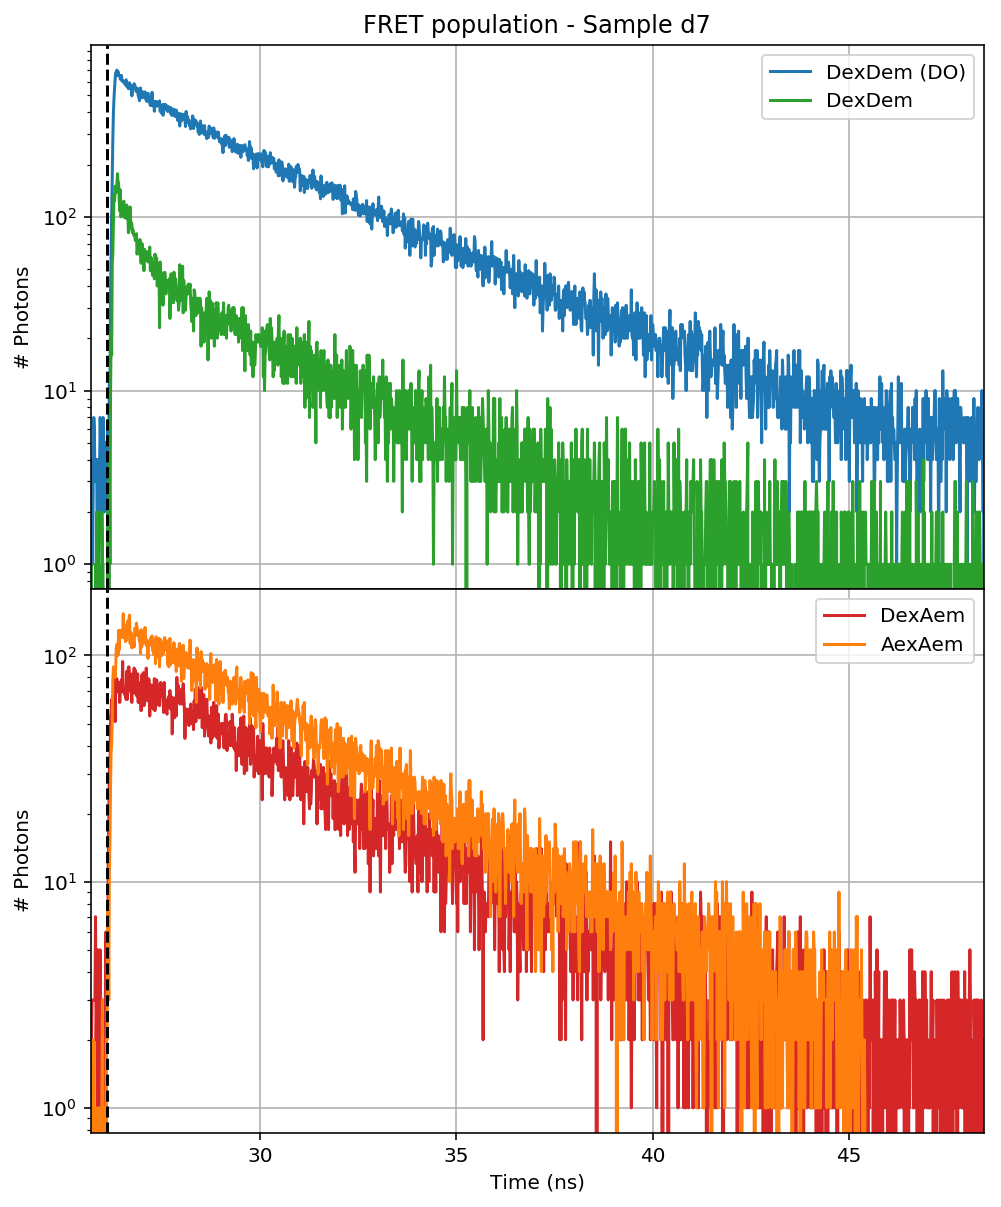

In [62]:
fig, ax = plt.subplots(2, 1, figsize=(8, 10), sharex=True)
plt.subplots_adjust(hspace=0)
time_axis = bins[:-1] * meta['nanotime_unit'] * 1e9
ax[0].plot(time_axis, nanot_hist_d_DO, color='C0', label='DexDem (DO)')
ax[0].plot(time_axis, nanot_hist_d, color='C2', label='DexDem')
ax[1].plot(time_axis, nanot_hist_a, color='C3', label='DexAem')
ax[1].plot(time_axis + offset, nanot_hist_aa, color='C1', label='AexAem')
for a in ax:
    a.set_yscale('log')
    a.grid(True)
    a.legend();
    a.set_ylabel('Probability' if hist_params['density'] else '# Photons');
    a.axvline(nt_th, ls='--', color='k')
ax[1].set_xlabel('Time (ns)');
has_counts = np.where((nanot_hist_d + nanot_hist_a) > 0)[0]
ax[0].set_xlim(time_axis[has_counts[0]], time_axis[has_counts[-1]]);
ax[0].set_title(f'FRET population - {label}');
#display(fig)
# plt.xlim(26, 35)
# ax[0].set_ylim(80)

In [63]:
nanotimes_d_offset = nanotimes_d * tcspc_unit * 1e9 - nt_th
nanotimes_a_offset = nanotimes_a * tcspc_unit * 1e9 - nt_th

Decay_bins = np.arange(0, 50, tcspc_unit * 1e9 * 5)

hist_params = dict(bins=Decay_bins, density=False)
nanot_hist_d_offset, _ = np.histogram(nanotimes_d_offset, **hist_params)
nanot_hist_a_offset, _ = np.histogram(nanotimes_a_offset, **hist_params)

### Fit models

In [64]:
def model_1exp_conv(x, tau, ampl, baseline, offset, irf):
    """
    Model function used to fit the data.
    """
    y = np.zeros(x.size)
    pos_range = (x - offset) >= 0
    y[pos_range] = ampl*np.exp(-(x[pos_range] - offset)/tau)
    z = np.convolve(y, irf, mode='same')
    #z = y
    z += baseline
    return z

def model_2exp_conv(x, tau1, ampl1, tau2, ampl2, baseline, offset, irf):
    """
    Model function used to fit the data.
    """
    y = np.zeros(x.size)
    pos_range = (x - offset) >= 0
    y[pos_range] = ampl1*(np.exp(-(x[pos_range] - offset)/tau1)) + \
                   ampl2*(np.exp(-(x[pos_range] - offset)/tau2))
    z = np.convolve(y, irf, mode='same')
    #z = y
    z += baseline
    return z

def model_3exp_conv(x, tau1, ampl1, tau2, ampl2, tau3, ampl3, baseline, offset, irf):
    """
    Model function used to fit the data.
    """
    y = np.zeros(x.size)
    pos_range = (x - offset) >= 0
    y[pos_range] = ampl1*(np.exp(-(x[pos_range] - offset)/tau1)) + \
                   ampl2*(np.exp(-(x[pos_range] - offset)/tau2)) + \
                   ampl3*(np.exp(-(x[pos_range] - offset)/tau3))
    z = np.convolve(y, irf, mode='same')
    z += baseline
    return z

def residuals_func(params, x, y, weight, irf, model_func):
    """
    Returns the array of residuals for the current parameters.
    """
    resid = (y - model_func(x, irf=irf, **params.valuesdict()))
    if weight:
        resid /= np.sqrt(model_func(x, irf=irf, **params.valuesdict()))
    return resid

def loglikelihood_func(params, x, y, irf, model_func):
    y_model = model_func(x, irf=irf, **params.valuesdict())  # λ
    neg_log_likelihood = (y_model - y * np.log(y_model)).sum()
    return neg_log_likelihood

The mass-function of Poisson distribution is:

$$ p_(k|\lambda) = \frac{\lambda^k}{k!}e^{-\lambda} $$

Each bin of a TCSPC histogram is a Poisson variable. Given an estimated
rate $\lambda$ the likelihood of one bin is 
$\mathcal{L}(k|\lambda) = p_(k|\lambda)$. The log-likelihood is:

$$ \log p_(k|\lambda) = k \log \lambda - \lambda - \log(k!)$$

Here, $\lambda$ is the rate estimated from the model and $k$ are the experimental
counts. Considering $n$ TCSPC bins, the likelihood function is:

$$ \mathcal{L}(k | \lambda) = \prod_i p_(k_i|\lambda_i) $$

and the log-likelihood:

$$ \log \mathcal{L}(k | \lambda) = \sum_i \log p_(k_i|\lambda_i)
= \sum_i k_i \log \lambda_i - \lambda_i - \log(k_i!)$$

The $\{\lambda_i\}$ depend on the model (they are the model decay value in each bin). 
When maximizing this function
we can neglect $\log(k_i!)$ as it depends only on the data.

In [65]:
import lmfit
import pybroom as br

In [66]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

### D-only decay fit

In [67]:
DD_irf = irf.loc[~pd.isnull(irf.DD_smooth1), 'DD_smooth1']

In [68]:
imin = 1720
weight = True
model = model_1exp_conv
params0 = lmfit.Parameters()
params0.add('tau', min=0.1, max=10, value=4)
params0.add('ampl', min=0, max=2000, value=500)
params0.add('baseline', min=1, max=38, value=8.616, vary=True)
params0.add('offset', min=0, max=60, value=28, vary=True)

x, y = time_axis[imin:], nanot_hist_d_DO[imin:]
fitfunc_kws={'y': y, 'x': x, 'model_func': model, 'weight': weight, 
             'irf': DD_irf}
res = lmfit.minimize(residuals_func, params0, kws=fitfunc_kws, method='nelder')
res = lmfit.minimize(residuals_func, res.params, kws=fitfunc_kws)
y_model0 = model(x,  irf=DD_irf, **params0.valuesdict())
y_model = model(x,  irf=DD_irf, **res.params.valuesdict())
#y_model = y_model0
residuals = y - y_model
residuals_scaled = residuals / np.sqrt(y_model)
residuals_corr = np.correlate(residuals_scaled, residuals_scaled, mode='full')
residuals_corr = residuals_corr[int(residuals_corr.size/2 + 1):]
residuals_corr_t = np.arange(residuals_corr.size) * tcspc_unit

In [69]:
imin = 1720
weight = True
model = model_1exp_conv
params0 = lmfit.Parameters()
params0.add('tau', min=0.1, max=10, value=4)
params0.add('ampl', min=0, max=2000, value=500)
params0.add('baseline', min=1, max=38, value=8.616, vary=True)
params0.add('offset', min=0, max=60, value=28, vary=True)

x, y = time_axis[imin:], nanot_hist_d_DO[imin:]
fitfunc_kws={'y': y, 'x': x, 'model_func': model, 'irf': DD_irf}
res = lmfit.minimize(loglikelihood_func, params0, kws=fitfunc_kws, method='differential_evolution')
#res = lmfit.minimize(loglikelihood_func, res.params, kws=fitfunc_kws, method='least_squares')
y_model0 = model(x,  irf=DD_irf, **params0.valuesdict())
y_model = model(x,  irf=DD_irf, **res.params.valuesdict())
#y_model = y_model0
residuals = y - y_model
residuals_scaled = residuals / np.sqrt(y_model)
residuals_corr = np.correlate(residuals_scaled, residuals_scaled, mode='full')
residuals_corr = residuals_corr[int(residuals_corr.size/2 + 1):]
residuals_corr_t = np.arange(residuals_corr.size) * tcspc_unit

,name,value,min,max,vary,expr,stderr,init_value
0,ampl,611.180046,0.0,2000,True,NaN,NaN,-0.523599
1,baseline,3.658872,1.0,38,True,NaN,NaN,-0.628985
2,offset,27.975498,0.0,60,True,NaN,NaN,-0.066716
3,tau,3.661724,0.1,10,True,NaN,NaN,-0.213745


/opt/conda/miniconda3/envs/py36-sys/lib/python3.6/site-packages/matplotlib/scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


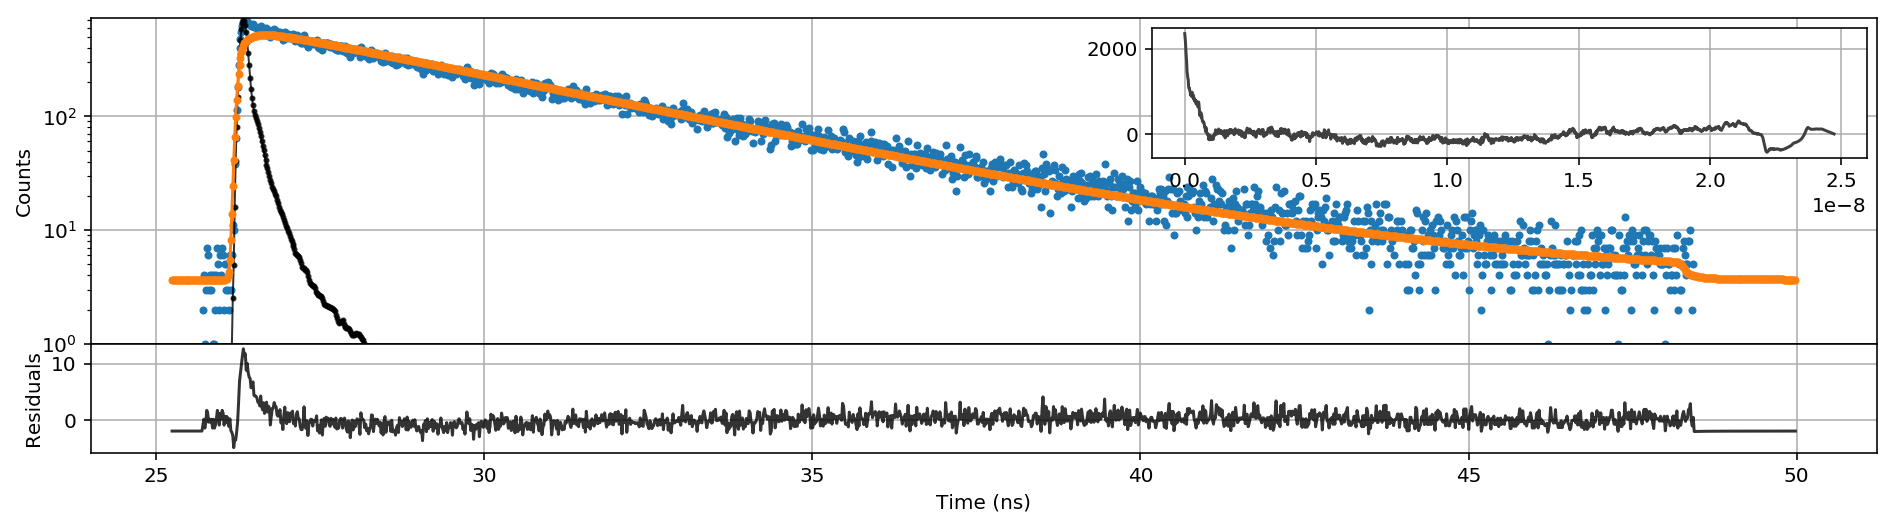

In [70]:
kws = dict(marker='o', ms=3, lw=0, alpha=1)
fig, ax = plt.subplots(2, 1, figsize=(16, 4), sharex=True, 
                       gridspec_kw={'height_ratios': [3, 1]})
plt.subplots_adjust(hspace=0)
inax = inset_axes(ax[0], width="40%", height="40%", loc=1)
inax.plot(residuals_corr_t, residuals_corr, color='0.25')
inax.grid()
ax[0].plot(x, y, label='data', **kws) 
ax[0].plot(irf.DD_smooth1 / irf.DD_smooth1.max() * y.max(), '-ko', ms=2, alpha=0.8, lw=1)
ax[0].plot(x, y_model, '-o', ms=3, color='C1', label='fit')
ax[1].plot(x, residuals_scaled, color='k', alpha=0.8)
ax[1].set(xlabel='Time (ns)', ylabel='Residuals')
ax[0].set_ylabel('Counts')
# ax[0].legend(loc='upper left', bbox_to_anchor=(0.2, 0.95))
for a in ax:
    a.grid()
#     a.axvline(t1, color='k', ls='--', alpha=0.5)
#     a.axvline(t2, color='k', ls='--', alpha=0.5)
# ax[0].set_xlim(26, 35)
ax[0].set_ylim(1)
ax[0].set_yscale('log')
br.tidy(res)

In [71]:
res.params.pretty_print()
lmfit.report_fit(res)

Name         Value      Min      Max   Stderr     Vary     Expr Brute_Step
ampl         611.2        0     2000     None     True     None     None
baseline     3.659        1       38     None     True     None     None
offset       27.98        0       60     None     True     None     None
tau          3.662      0.1       10     None     True     None     None
[[Fit Statistics]]
    # function evals   = 1886
    # data points      = 1
    # variables        = 4
    chi-square         = 488611419670.925
    reduced chi-square = 488611419670.925
    Akaike info crit   = 34.915
    Bayesian info crit = 26.915
[[Variables]]
    tau:        3.66172435 (init= 4)
    ampl:       611.180046 (init= 500)
    baseline:   3.65887240 (init= 8.616)
    offset:     27.9754976 (init= 28)


In [72]:
imin = 1720 
weight = True
model = model_2exp_conv
params0 = lmfit.Parameters()
params0.add('tau1', min=0.1, max=10, value=3.925)
params0.add('ampl1', min=0, max=2000, value=421.6)
params0.add('tau2', min=0.1, max=10, value=0.4466)
params0.add('ampl2', min=0, max=2000, value=278.7)
params0.add('baseline', min=1, max=38, value=2.055, vary=True)
params0.add('offset', min=0, max=60, value=27.96, vary=True)

x, y = time_axis[imin:], nanot_hist_d_DO[imin:]
fitfunc_kws={'y': y, 'x': x, 'model_func': model, 'weight': weight, 
             'irf': DD_irf}
res = lmfit.minimize(residuals_func, params0, kws=fitfunc_kws, method='nelder')
res = lmfit.minimize(residuals_func, res.params, kws=fitfunc_kws)

y_model0 = model(x,  irf=DD_irf, **params0.valuesdict())
y_model = model(x,  irf=DD_irf, **res.params.valuesdict())
#y_model = y_model0
residuals = y - y_model
residuals_scaled = residuals / np.sqrt(y_model)
residuals_corr = np.correlate(residuals_scaled, residuals_scaled, mode='full')
residuals_corr = residuals_corr[int(residuals_corr.size/2 + 1):]
residuals_corr_t = np.arange(residuals_corr.size) * tcspc_unit

/opt/conda/miniconda3/envs/py36-sys/lib/python3.6/site-packages/matplotlib/scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


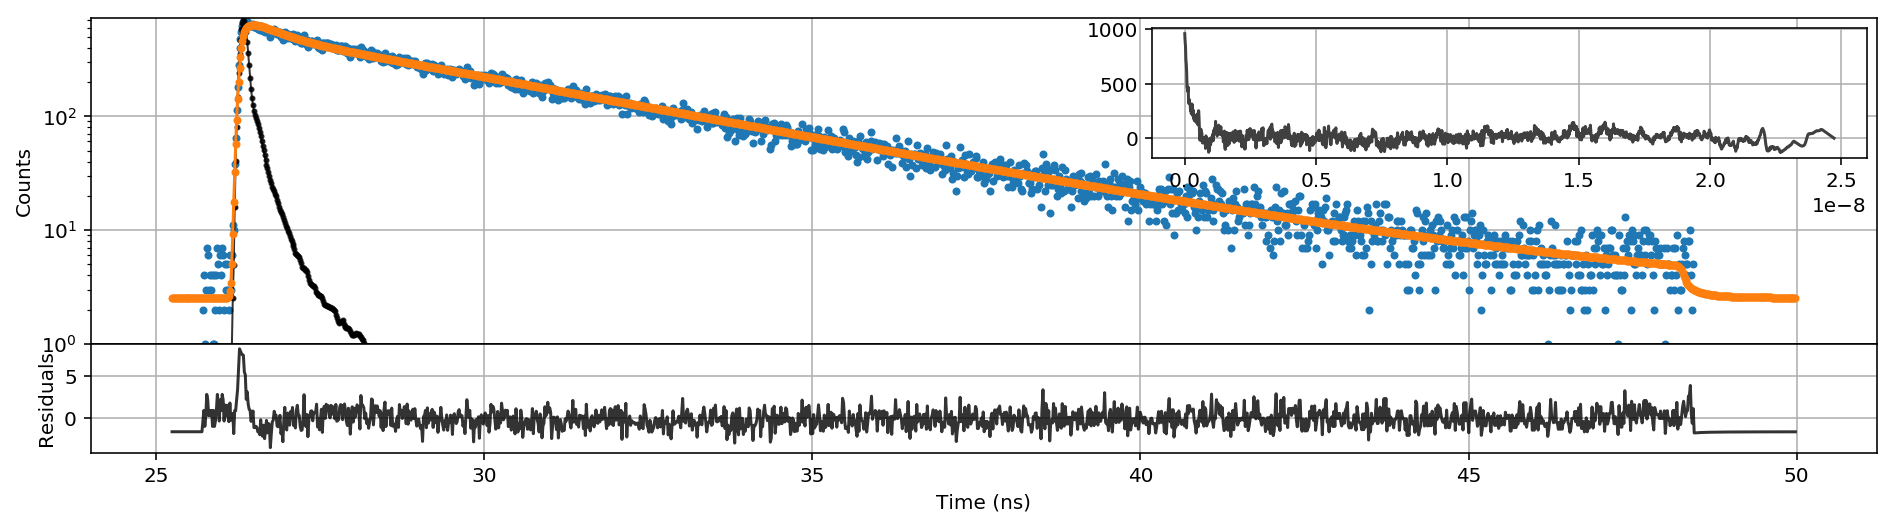

In [73]:
kws = dict(marker='o', ms=3, lw=0, alpha=1)
fig, ax = plt.subplots(2, 1, figsize=(16, 4), sharex=True, 
                       gridspec_kw={'height_ratios': [3, 1]})
plt.subplots_adjust(hspace=0)
inax = inset_axes(ax[0], width="40%", height="40%", loc=1)
inax.plot(residuals_corr_t, residuals_corr, color='0.25')
inax.grid()
ax[0].plot(x, y, label='data', **kws) 
ax[0].plot(irf.DD_smooth1 / irf.DD_smooth1.max() * y.max(), '-ko', ms=2, alpha=0.8, lw=1)
ax[0].plot(x, y_model, '-o', ms=3, color='C1', label='fit')
ax[1].plot(x, residuals_scaled, color='k', alpha=0.8)
ax[1].set(xlabel='Time (ns)', ylabel='Residuals')
ax[0].set_ylabel('Counts')
# ax[0].legend(loc='upper left', bbox_to_anchor=(0.2, 0.95))
for a in ax:
    a.grid()
#     a.axvline(t1, color='k', ls='--', alpha=0.5)
#     a.axvline(t2, color='k', ls='--', alpha=0.5)
# ax[0].set_xlim(26, 35)
ax[0].set_ylim(1)
ax[0].set_yscale('log')

In [74]:
res.params.pretty_print()
lmfit.report_fit(res)

Name         Value      Min      Max   Stderr     Vary     Expr Brute_Step
ampl1        538.5        0     2000 1.553e+07     True     None     None
ampl2        380.7        0     2000 1.178e+08     True     None     None
baseline      2.52        1       38   0.1406     True     None     None
offset       27.99        0       60 1.158e+05     True     None     None
tau1         4.016      0.1       10  0.02214     True     None     None
tau2        0.3742      0.1       10  0.02113     True     None     None
[[Fit Statistics]]
    # function evals   = 157
    # data points      = 1686
    # variables        = 6
    chi-square         = 2218.983
    reduced chi-square = 1.321
    Akaike info crit   = 475.128
    Bayesian info crit = 507.708
[[Variables]]
    tau1:       4.01590026 +/- 0.022143 (0.55%) (init= 4.020301)
    ampl1:      538.470302 +/- 1.55e+07 (2884267.65%) (init= 539.3573)
    tau2:       0.37424703 +/- 0.021127 (5.65%) (init= 0.3930573)
    ampl2:      380.683752 +/- 1

In [75]:
br.glance(res)

,method,num_params,num_data_points,chisqr,redchi,AIC,BIC,num_func_eval,success,message
0,leastsq,6,1686,2218.983144,1.320823,475.127657,507.708342,157,True,Fit succeeded.


In [76]:
br.tidy(res)

,name,value,min,max,vary,expr,stderr,init_value
0,ampl1,538.470302,0.0,2000,True,NaN,1.553092e+07,-0.478719
1,ampl2,380.683752,0.0,2000,True,NaN,1.178205e+08,-0.705131
2,baseline,2.519853,1.0,38,True,NaN,1.405839e-01,-1.164596
3,offset,27.991391,0.0,60,True,NaN,1.158293e+05,-0.067548
4,tau1,4.015900,0.1,10,True,NaN,2.214397e-02,-0.209550
5,tau2,0.374247,0.1,10,True,NaN,2.112790e-02,-1.224972


### D-FRET decay fit

In [77]:
DD_irf = irf.loc[~pd.isnull(irf.DD_smooth1), 'DD_smooth1']

In [78]:
ampl1  =    538.470302
ampl2  =     380.683752
tau1   =     4.015900
tau2   =    0.374247

D_area_ratio = ampl2 * tau2 / (ampl1 * tau1)
D_area_ratio

0.0658837063721655

In [79]:
ampl2 = (ampl1 * tau1) * 0.0658837063721655 / tau2

In [80]:
imin = 1720 
weight = True
model = model_3exp_conv
params0 = lmfit.Parameters()
params0.add('tau1', value=4.015900, vary=False)
params0.add('ampl1', min=0, value=7)
params0.add('tau2', value=0.374247, vary=False)
params0.add('ampl2', expr='(ampl1 * tau1) * 0.0658837063721655 / tau2')
params0.add('tau3', min=0.1, max=10, value=0.5, vary=False)
params0.add('ampl3', min=0, value=10)
params0.add('baseline', min=0.1, max=38, value=2, vary=True)
params0.add('offset', min=0, max=60, value=27.99, vary=True)

x, y = time_axis[imin:], nanot_hist_d[imin:]
fitfunc_kws={'y': y, 'x': x, 'model_func': model, 'weight': weight, 
             'irf': DD_irf}
res = lmfit.minimize(residuals_func, params0, kws=fitfunc_kws, method='nelder')
res = lmfit.minimize(residuals_func, res.params, kws=fitfunc_kws)

y_model0 = model(x,  irf=DD_irf, **params0.valuesdict())
y_model = model(x,  irf=DD_irf, **res.params.valuesdict())
#y_model = y_model0
residuals = y - y_model
residuals_scaled = residuals / np.sqrt(y_model)
residuals_corr = np.correlate(residuals_scaled, residuals_scaled, mode='full')
residuals_corr = residuals_corr[int(residuals_corr.size/2 + 1):]
residuals_corr_t = np.arange(residuals_corr.size) * tcspc_unit

/opt/conda/miniconda3/envs/py36-sys/lib/python3.6/site-packages/matplotlib/scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


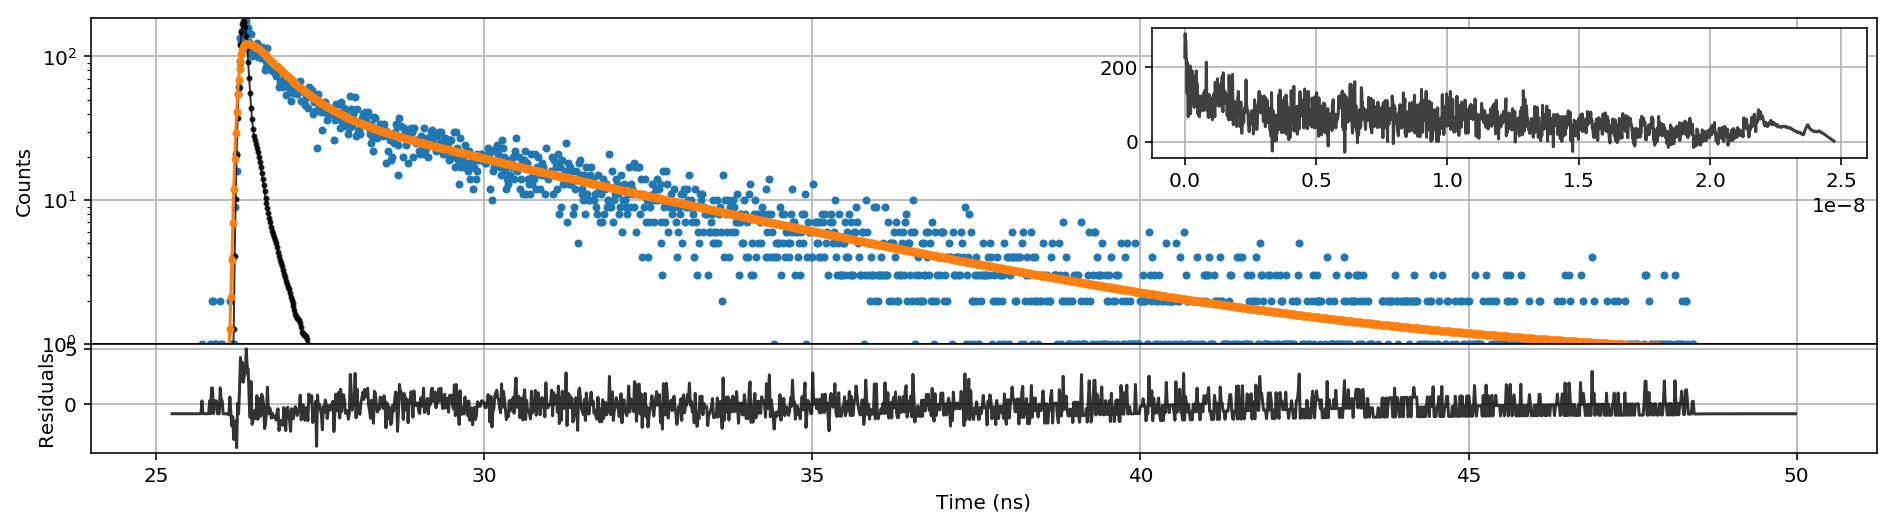

In [81]:
kws = dict(marker='o', ms=3, lw=0, alpha=1)
fig, ax = plt.subplots(2, 1, figsize=(16, 4), sharex=True, 
                       gridspec_kw={'height_ratios': [3, 1]})
plt.subplots_adjust(hspace=0)
inax = inset_axes(ax[0], width="40%", height="40%", loc=1)
inax.plot(residuals_corr_t, residuals_corr, color='0.25')
inax.grid()
ax[0].plot(x, y, label='data', **kws) 
ax[0].plot(irf.DD_smooth1 / irf.DD_smooth1.max() * y.max(), '-ko', ms=2, alpha=0.8, lw=1)
ax[0].plot(x, y_model, '-o', ms=3, color='C1', label='fit')
ax[1].plot(x, residuals_scaled, color='k', alpha=0.8)
ax[1].set(xlabel='Time (ns)', ylabel='Residuals')
ax[0].set_ylabel('Counts')
# ax[0].legend(loc='upper left', bbox_to_anchor=(0.2, 0.95))
for a in ax:
    a.grid()
#     a.axvline(t1, color='k', ls='--', alpha=0.5)
#     a.axvline(t2, color='k', ls='--', alpha=0.5)
# ax[0].set_xlim(26, 35)
ax[0].set_ylim(1)
ax[0].set_yscale('log')

In [82]:
res.params.pretty_print()
lmfit.report_fit(res)

Name         Value      Min      Max   Stderr     Vary     Expr Brute_Step
ampl1        45.64        0      inf    2.888     True     None     None
ampl2        32.27     -inf      inf    2.042    False (ampl1 * tau1) * 0.0658837063721655 / tau2     None
ampl3        109.8        0      inf    78.04     True     None     None
baseline    0.7449      0.1       38  0.04436     True     None     None
offset       27.98        0       60   0.2725     True     None     None
tau1         4.016     -inf      inf        0    False     None     None
tau2        0.3742     -inf      inf        0    False     None     None
tau3           0.5      0.1       10        0    False     None     None
[[Fit Statistics]]
    # function evals   = 172
    # data points      = 1686
    # variables        = 4
    chi-square         = 1678.241
    reduced chi-square = 0.998
    Akaike info crit   = 0.223
    Bayesian info crit = 21.943
[[Variables]]
    tau1:       4.0159 (fixed)
    ampl1:      45.6403801 +/

In [83]:
br.glance(res)

,method,num_params,num_data_points,chisqr,redchi,AIC,BIC,num_func_eval,success,message
0,leastsq,4,1686,1678.240868,0.997765,0.222959,21.943416,172,True,Fit succeeded.


In [84]:
br.tidy(res)

,name,value,min,max,vary,expr,stderr,init_value
0,ampl1,45.640380,0.000000,inf,True,None,2.887926,64.286184
1,ampl2,32.266498,-inf,inf,False,(ampl1 * tau1) * 0.0658837063721655 / tau2,2.041685,NaN
2,ampl3,109.751837,0.000000,inf,True,None,78.036545,6.988803
3,baseline,0.744865,0.100000,38.000000,True,None,0.044359,-1.382291
4,offset,27.976704,0.000000,60.000000,True,None,0.272488,-0.068475
5,tau1,4.015900,-inf,inf,False,None,0.000000,NaN
6,tau2,0.374247,-inf,inf,False,None,0.000000,NaN
7,tau3,0.500000,0.100000,10.000000,False,None,0.000000,NaN


### A-FRET decay fit

In [85]:
DA_irf = irf.loc[~pd.isnull(irf.DA_smooth1), 'DA_smooth1']

In [86]:
imin = 1720 
weight = True
model = model_1exp_conv
params0 = lmfit.Parameters()
params0.add('tau', value=3.924549)
params0.add('ampl', min=0, max=500, value=100)
# params0.add('tau2', value=4.07)
# params0.add('ampl2', min=0, max=500, value=500)
# params0.add('tau3', min=0.1, max=10, value=1.524)
# params0.add('ampl3', min=0, max=500, value=10)
params0.add('baseline', min=1, max=38, value=1.6)
params0.add('offset', min=0, max=60, value=27.99)

x, y = time_axis[imin:], nanot_hist_a[imin:]
fitfunc_kws={'y': y, 'x': x, 'model_func': model, 'weight': weight, 
             'irf': DA_irf}
res = lmfit.minimize(residuals_func, params0, kws=fitfunc_kws, method='nelder')
res = lmfit.minimize(residuals_func, res.params, kws=fitfunc_kws)

y_model0 = model(x,  irf=DA_irf, **params0.valuesdict())
y_model = model(x,  irf=DA_irf, **res.params.valuesdict())
#y_model = y_model0
residuals = y - y_model
residuals_scaled = residuals / np.sqrt(y_model)
residuals_corr = np.correlate(residuals_scaled, residuals_scaled, mode='full')
residuals_corr = residuals_corr[int(residuals_corr.size/2 + 1):]
residuals_corr_t = np.arange(residuals_corr.size) * tcspc_unit

/opt/conda/miniconda3/envs/py36-sys/lib/python3.6/site-packages/matplotlib/scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


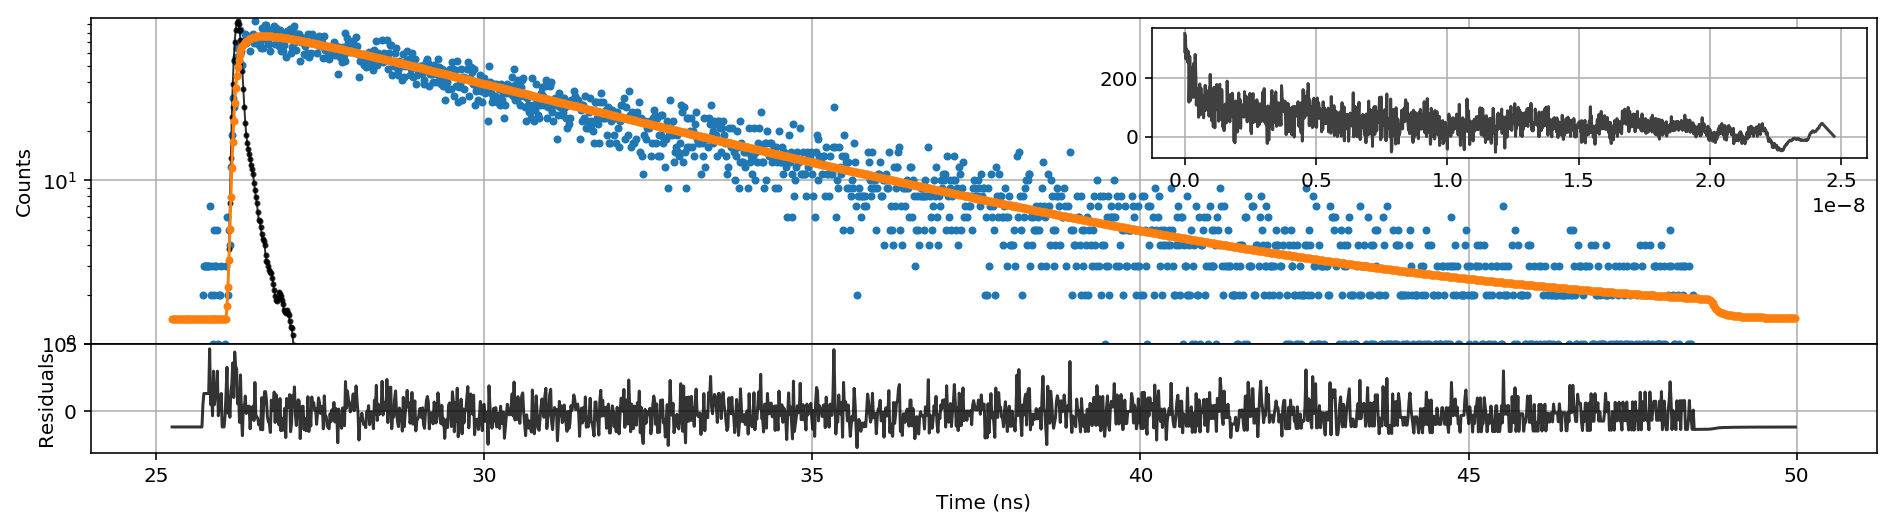

In [87]:
kws = dict(marker='o', ms=3, lw=0, alpha=1)
fig, ax = plt.subplots(2, 1, figsize=(16, 4), sharex=True, 
                       gridspec_kw={'height_ratios': [3, 1]})
plt.subplots_adjust(hspace=0)
inax = inset_axes(ax[0], width="40%", height="40%", loc=1)
inax.plot(residuals_corr_t, residuals_corr, color='0.25')
inax.grid()
ax[0].plot(x, y, label='data', **kws) 
ax[0].plot(irf.DA_smooth1 / irf.DA_smooth1.max() * y.max(), '-ko', ms=2, alpha=0.8, lw=1)
ax[0].plot(x, y_model, '-o', ms=3, color='C1', label='fit')
ax[1].plot(x, residuals_scaled, color='k', alpha=0.8)
ax[1].set(xlabel='Time (ns)', ylabel='Residuals')
ax[0].set_ylabel('Counts')
# ax[0].legend(loc='upper left', bbox_to_anchor=(0.2, 0.95))
for a in ax:
    a.grid()
#     a.axvline(t1, color='k', ls='--', alpha=0.5)
#     a.axvline(t2, color='k', ls='--', alpha=0.5)
# ax[0].set_xlim(26, 35)
ax[0].set_ylim(1)
ax[0].set_yscale('log')

In [88]:
res.params.pretty_print()
lmfit.report_fit(res)

Name         Value      Min      Max   Stderr     Vary     Expr Brute_Step
ampl         89.39        0      500  3.1e+07     True     None     None
baseline     1.428        1       38  0.08373     True     None     None
offset       27.46        0       60 1.462e+06     True     None     None
tau          4.216     -inf      inf  0.04626     True     None     None
[[Fit Statistics]]
    # function evals   = 14
    # data points      = 1686
    # variables        = 4
    chi-square         = 1896.441
    reduced chi-square = 1.127
    Akaike info crit   = 206.308
    Bayesian info crit = 228.028
[[Variables]]
    tau:        4.21635440 +/- 0.046261 (1.10%) (init= 4.216349)
    ampl:       89.3909975 +/- 3.10e+07 (34684344.29%) (init= 89.40402)
    baseline:   1.42846323 +/- 0.083730 (5.86%) (init= 1.428497)
    offset:     27.4586162 +/- 1.46e+06 (5325417.46%) (init= 27.45797)
[[Correlations]] (unreported correlations are <  0.100)
    C(ampl, offset)              = -1.000 
    C(tau, 

In [89]:
br.glance(res)

,method,num_params,num_data_points,chisqr,redchi,AIC,BIC,num_func_eval,success,message
0,leastsq,4,1686,1896.441238,1.127492,206.307721,228.028177,14,True,Fit succeeded.


In [90]:
br.tidy(res)

,name,value,min,max,vary,expr,stderr,init_value
0,ampl,89.390998,0.000000,500.000000,True,NaN,3.100468e+07,-0.697605
1,baseline,1.428463,1.000000,38.000000,True,NaN,8.373071e-02,-1.355149
2,offset,27.458616,0.000000,60.000000,True,NaN,1.462286e+06,-0.084836
3,tau,4.216354,-inf,inf,True,NaN,4.626114e-02,4.216349


### A-only decay fit

In [91]:
AA_irf = irf_AA.loc[~pd.isnull(irf_AA.AA_smooth1), 'AA_smooth1'].values

In [92]:
x.shape, AA_irf.shape, y.shape, imin

((1686,), (136,), (1686,), 1720)

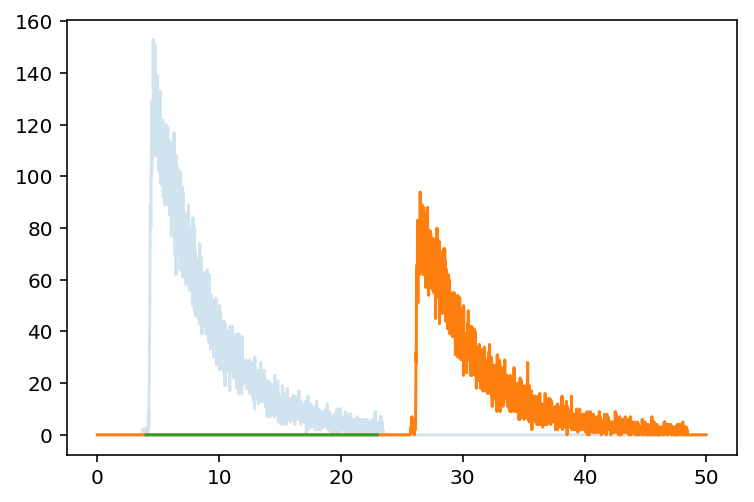

In [93]:
plt.plot(time_axis, nanot_hist_aa, alpha=0.2)
x, y = time_axis, nanot_hist_a
plt.plot(x,y)
mask = (time_axis > 4) * (time_axis < 23)
plt.plot(x[mask], y[mask])

In [94]:
t_min = 4
t_max = 23
weight = True
model = model_1exp_conv
params0 = lmfit.Parameters()
params0.add('tau', min=0.1, max=10, value=4.371993)
params0.add('ampl', min=0, max=2000, value=500)
params0.add('baseline', min=1, max=38, value=8.616, vary=True)
params0.add('offset', min=0, max=60, value=5, vary=True)

mask = (time_axis > t_min) * (time_axis < t_max)
x, y = time_axis[mask], nanot_hist_aa[mask]
fitfunc_kws={'y': y, 'x': x, 'model_func': model, 'weight': weight, 
             'irf': AA_irf}
res = lmfit.minimize(residuals_func, params0, kws=fitfunc_kws, method='nelder')
res = lmfit.minimize(residuals_func, res.params, kws=fitfunc_kws)
y_model0 = model(x,  irf=AA_irf, **params0.valuesdict())
y_model = model(x,  irf=AA_irf, **res.params.valuesdict())
#y_model = y_model0
residuals = y - y_model
residuals_scaled = residuals / np.sqrt(y_model)
residuals_corr = np.correlate(residuals_scaled, residuals_scaled, mode='full')
residuals_corr = residuals_corr[int(residuals_corr.size/2 + 1):]
residuals_corr_t = np.arange(residuals_corr.size) * tcspc_unit

,name,value,min,max,vary,expr,stderr,init_value
0,ampl,146.339371,0.0,2000,True,NaN,7.421963e+07,-1.085557
1,baseline,2.030604,1.0,38,True,NaN,1.437403e-01,-1.144573
2,offset,4.931666,0.0,60,True,NaN,2.054259e+06,-0.989231
3,tau,4.050585,0.1,10,True,NaN,3.743485e-02,0.036020


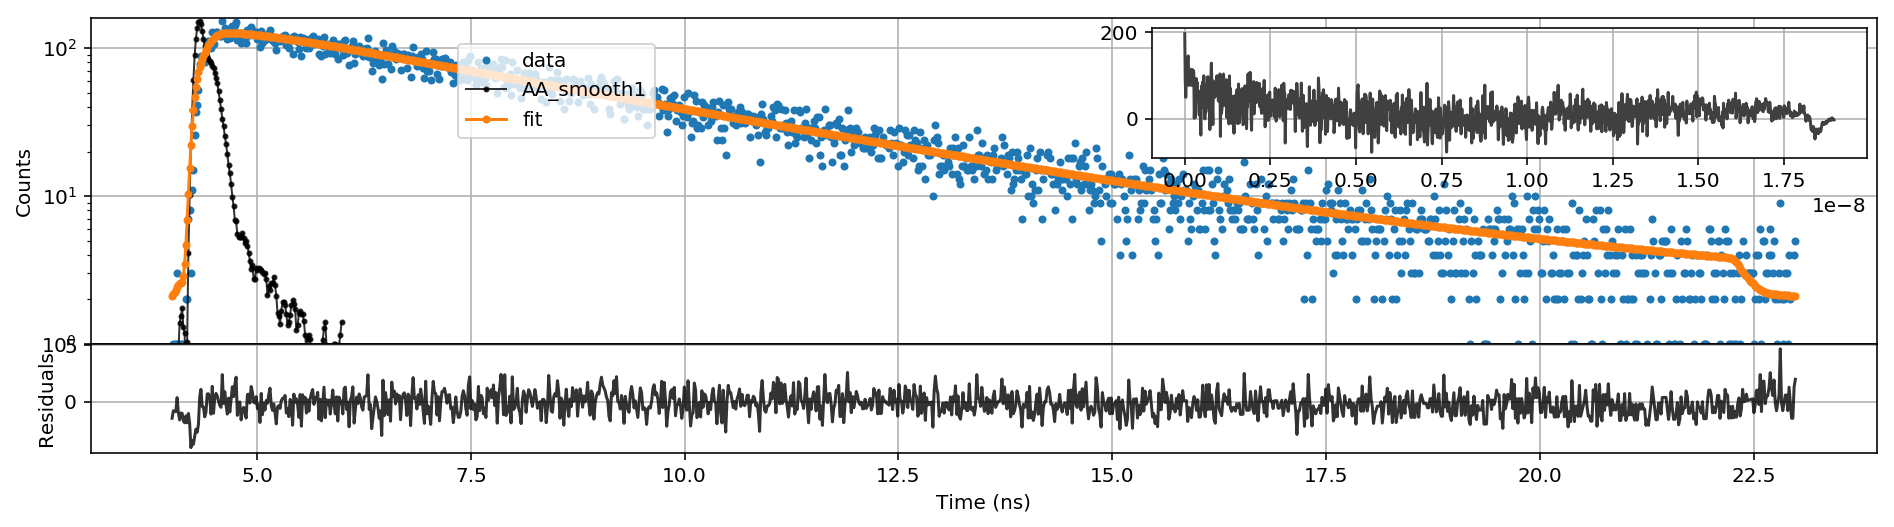

In [95]:
kws = dict(marker='o', ms=3, lw=0, alpha=1)
fig, ax = plt.subplots(2, 1, figsize=(16, 4), sharex=True, 
                       gridspec_kw={'height_ratios': [3, 1]})
plt.subplots_adjust(hspace=0)
inax = inset_axes(ax[0], width="40%", height="40%", loc=1)
inax.plot(residuals_corr_t, residuals_corr, color='0.25')
inax.grid()
ax[0].plot(x, y, label='data', **kws) 
ax[0].plot(irf_AA.AA_smooth1 / irf_AA.AA_smooth1.max() * y.max(), '-ko', ms=2, alpha=0.8, lw=1)
ax[0].plot(x, y_model, '-o', ms=3, color='C1', label='fit')
ax[1].plot(x, residuals_scaled, color='k', alpha=0.8)
ax[1].set(xlabel='Time (ns)', ylabel='Residuals')
ax[0].set_ylabel('Counts')
ax[0].legend(loc='upper left', bbox_to_anchor=(0.2, 0.95))
for a in ax:
    a.grid()
#     a.axvline(t1, color='k', ls='--', alpha=0.5)
#     a.axvline(t2, color='k', ls='--', alpha=0.5)
# ax[0].set_xlim(26, 35)
ax[0].set_ylim(1)
ax[0].set_yscale('log')
br.tidy(res)

In [96]:
res.params.pretty_print()
lmfit.report_fit(res)

Name         Value      Min      Max   Stderr     Vary     Expr Brute_Step
ampl         146.3        0     2000 7.422e+07     True     None     None
baseline     2.031        1       38   0.1437     True     None     None
offset       4.932        0       60 2.054e+06     True     None     None
tau          4.051      0.1       10  0.03743     True     None     None
[[Fit Statistics]]
    # function evals   = 38
    # data points      = 1294
    # variables        = 4
    chi-square         = 1397.504
    reduced chi-square = 1.083
    Akaike info crit   = 107.573
    Bayesian info crit = 128.235
[[Variables]]
    tau:        4.05058522 +/- 0.037434 (0.92%) (init= 5.228262)
    ampl:       146.339370 +/- 7.42e+07 (50717471.65%) (init= 115.4367)
    baseline:   2.03060425 +/- 0.143740 (7.08%) (init= 2.655126)
    offset:     4.93166640 +/- 2.05e+06 (41654453.85%) (init= 4.931886)
[[Correlations]] (unreported correlations are <  0.100)
    C(ampl, offset)              = -1.000 
    C(tau

In [97]:
br.glance(res)

,method,num_params,num_data_points,chisqr,redchi,AIC,BIC,num_func_eval,success,message
0,leastsq,4,1294,1397.504226,1.083337,107.572982,128.234956,38,True,Fit succeeded.


In [98]:
br.tidy(res)

,name,value,min,max,vary,expr,stderr,init_value
0,ampl,146.339371,0.0,2000,True,NaN,7.421963e+07,-1.085557
1,baseline,2.030604,1.0,38,True,NaN,1.437403e-01,-1.144573
2,offset,4.931666,0.0,60,True,NaN,2.054259e+06,-0.989231
3,tau,4.050585,0.1,10,True,NaN,3.743485e-02,0.036020


In [99]:
τ_A = res.params['tau'].value
τ_A

4.050585226530316

## Save decays

In [100]:
folder

PosixPath('../Relevant BH measurements/dsDNA/results')

In [101]:
decays = pd.DataFrame({'DD': nanot_hist_d, 'DA': nanot_hist_a, 
                       'AA': nanot_hist_aa, 'DO': nanot_hist_d_DO},
                       index=time_axis)
decays.index.name = 'time_ns'
decays.head()

,AA,DA,DD,DO
time_ns,,,,
0.000000,0,0,0,0
0.014678,0,0,0,0
0.029356,0,0,0,0
0.044035,0,0,0,0
0.058713,0,0,0,0


In [102]:
export_fname = folder / (name + '_exported_decays.csv') 
export_fname

PosixPath('../Relevant BH measurements/dsDNA/results/d7_exported_decays.csv')

In [103]:
decays.to_csv(export_fname)

## Experimental FCS

In [104]:
ts_unit = meta['timestamp_unit']
hw_unit = meta['timestamp_unit_hw']
ts_unit, hw_unit, round(hw_unit / ts_unit)

(1e-09, 5e-08, 50)

In [105]:
t_exp = np.array(burstsph_sel.loc[burstsph_sel.stream == 'DexDem', 'timestamp']) / round(hw_unit / ts_unit)
u_exp = np.array(burstsph_sel.loc[burstsph_sel.stream == 'DexAem', 'timestamp']) / round(hw_unit / ts_unit)

In [106]:
t_exp2 = t_exp + np.array((burstsph_sel.loc[DD, 'nanotime'] * tcspc_unit) / ts_unit)/ round(hw_unit / ts_unit)
u_exp2 = u_exp + np.array((burstsph_sel.loc[DA, 'nanotime'] * tcspc_unit) / ts_unit)/ round(hw_unit / ts_unit)

In [107]:
# compute lags in sec. then convert to timestamp units
bins_per_dec = 5
bins = np.unique(np.round(pyc.make_loglags(0, 9, bins_per_dec)).astype('int')) 
timelags_exp = bins[1:] * hw_unit
print(f'Min time-lag: {timelags_exp[0]},  Max time-lag: {timelags_exp[-1]},  # Time-lags: {len(timelags_exp)}')

Min time-lag: 1e-07,  Max time-lag: 50.0,  # Time-lags: 45


In [108]:
CC_DA_exp = pyc.pcorrelate(t_exp, u_exp, bins, normalize=True)+1
AC_DD_exp = pyc.pcorrelate(t_exp, t_exp, bins, normalize=True)+1

In [109]:
CC_DA_exp2 = pyc.pcorrelate(t_exp2, u_exp2, bins, normalize=True)+1
AC_DD_exp2 = pyc.pcorrelate(t_exp2, t_exp2, bins, normalize=True)+1

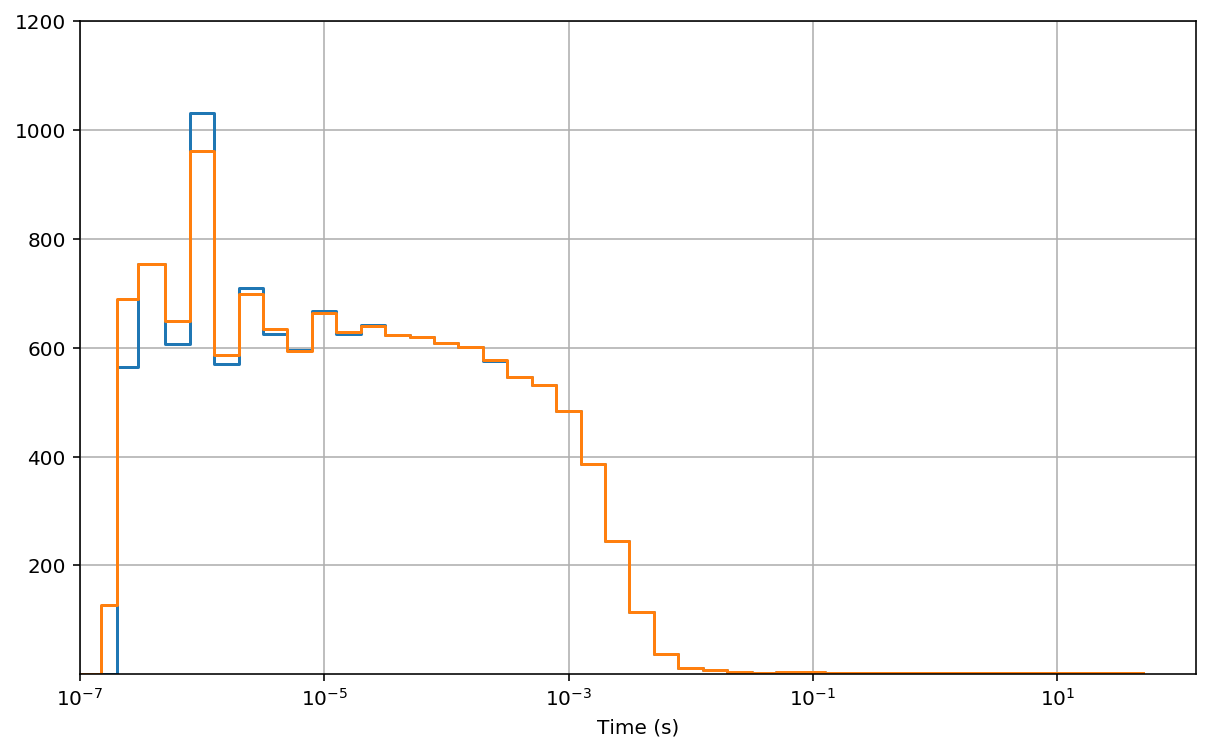

In [110]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.semilogx(timelags_exp, CC_DA_exp, drawstyle='steps-pre')
plt.semilogx(timelags_exp, CC_DA_exp2, drawstyle='steps-pre')
plt.xlabel('Time (s)')
plt.grid(True); plt.grid(True, which='minor', lw=0.3);
plt.xlim(1e-7)
plt.ylim(1, 1200);

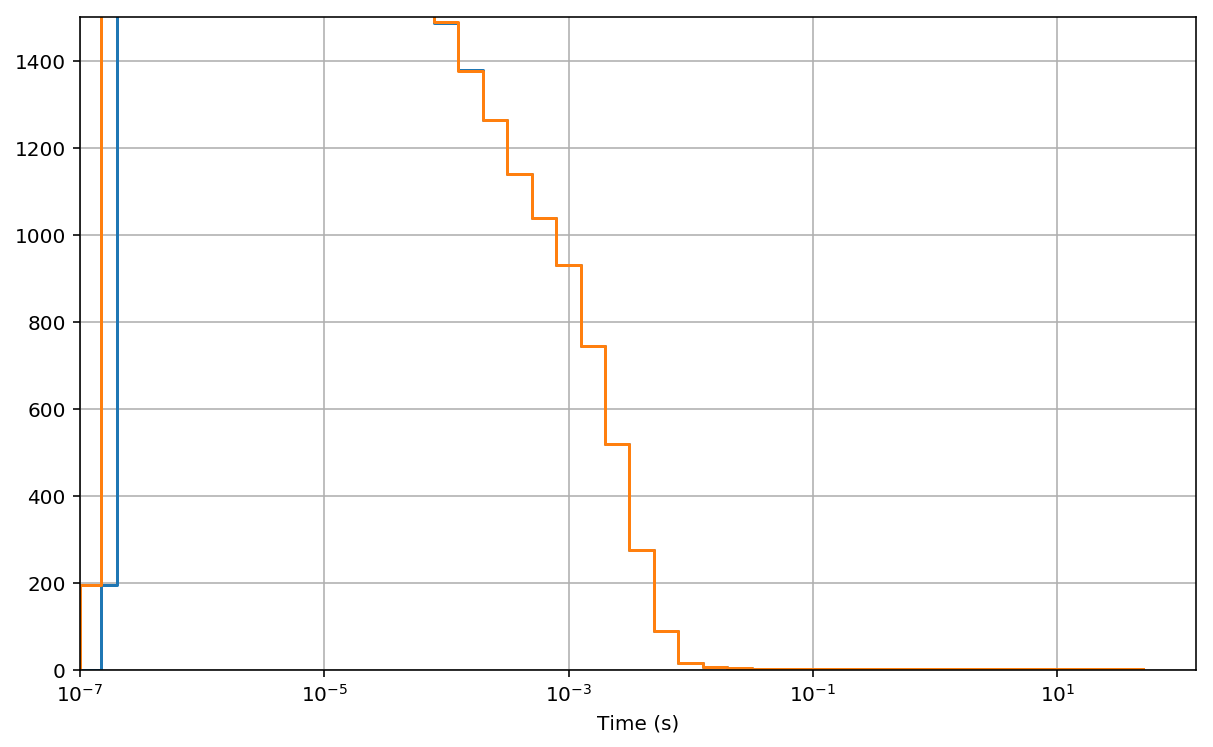

In [111]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.semilogx(timelags_exp, AC_DD_exp, drawstyle='steps-pre')
plt.semilogx(timelags_exp, AC_DD_exp2, drawstyle='steps-pre')
plt.xlabel('Time (s)')
plt.grid(True); plt.grid(True, which='minor', lw=0.3);
plt.xlim(1e-7)
plt.ylim(1, 1500);

In [112]:
Levitus_exp = AC_DD_exp / CC_DA_exp;

In [113]:
Levitus_exp2 = AC_DD_exp2 / CC_DA_exp2;

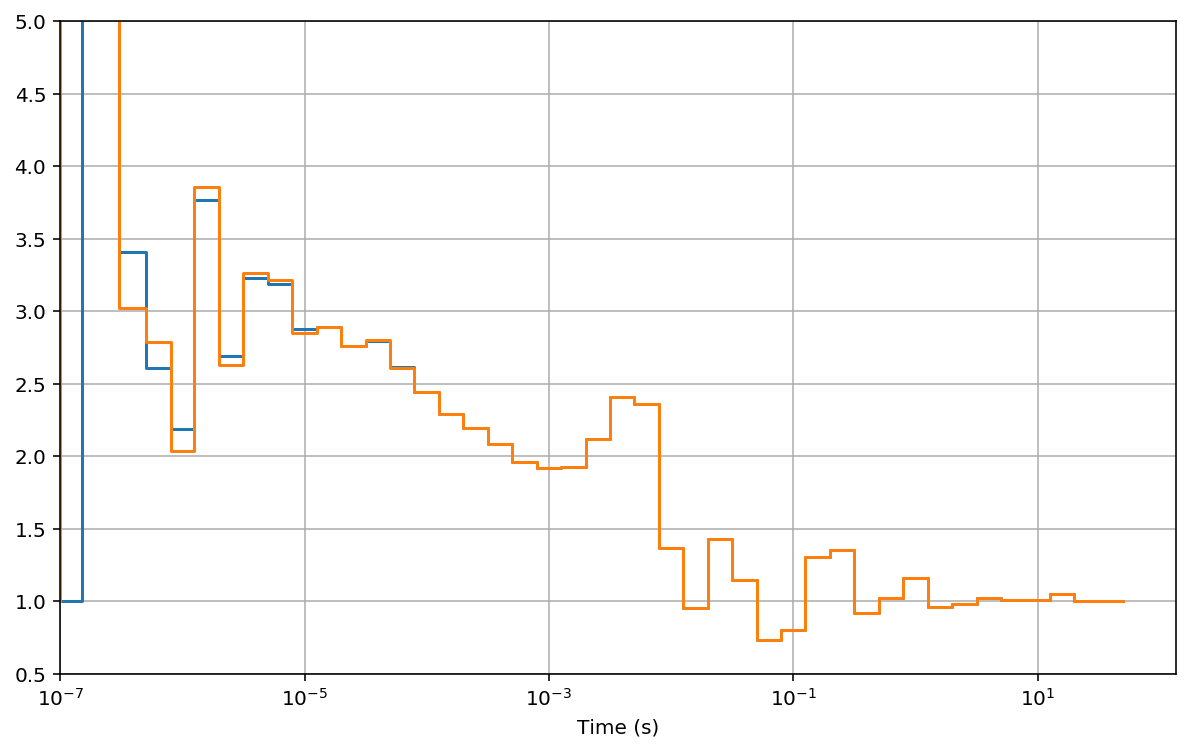

In [114]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.semilogx(timelags_exp, Levitus_exp, drawstyle='steps-pre')
plt.semilogx(timelags_exp, Levitus_exp2, drawstyle='steps-pre')
plt.xlabel('Time (s)')
plt.grid(True); plt.grid(True, which='minor', lw=0.3);
plt.xlim(1e-7)
plt.ylim(0.5, 5);

## Experimental Seidel plots

In [115]:
area1 = 4.015900 * 538.470302
area2 = 0.374247 * 380.683752

τ_A = 4.050585 * ns
τ_D = [4.015900 * ns, 0.374247 * ns]
D_fract = [area1 / (area1 + area2),  area2 / (area1 + area2)]

τ_D_mean = (τ_D[0]*D_fract[0]+τ_D[1]*D_fract[1])/(D_fract[0]+D_fract[1])
τ_D_mean2 = (τ_D[0]**2*D_fract[0]+τ_D[1]**2*D_fract[1])/(τ_D[0]*D_fract[0]+τ_D[1]*D_fract[1])

## Experimental mean nanotime per burst

In [116]:
mean_nanot_exp = burstsph_sel.groupby(['burst', 'stream'])['nanot'].mean() - nt_th
mean_nanot_exp = mean_nanot_exp.reset_index('stream')
mean_nanot_exp.head(3)

,stream,nanot
burst,,
0,DexDem,1.091427
0,DexAem,5.576728
0,AexAem,-17.306241


In [117]:
mean_nanot_exp_DD = mean_nanot_exp.query('stream == "DexDem"')['nanot']
mean_nanot_exp_DA = mean_nanot_exp.query('stream == "DexAem"')['nanot']
τ_D_mean = mean_nanot_exp_DD.mean()

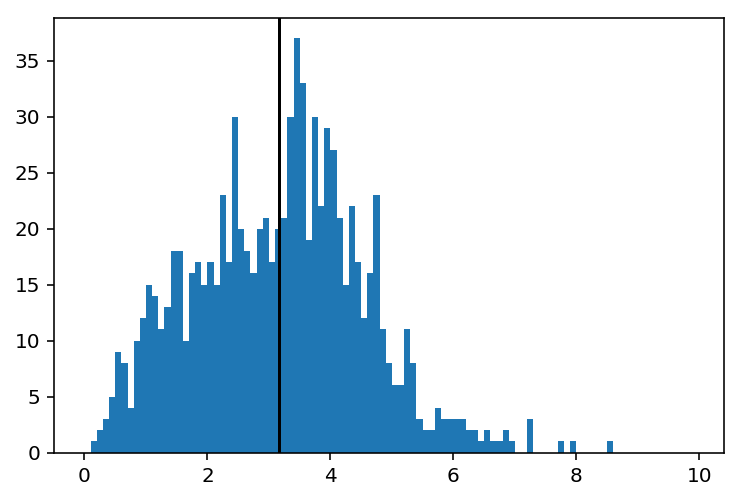

In [118]:
plt.hist(mean_nanot_exp_DD, bins=np.arange(0, 10, 0.1));
plt.axvline(τ_D_mean, color='k')

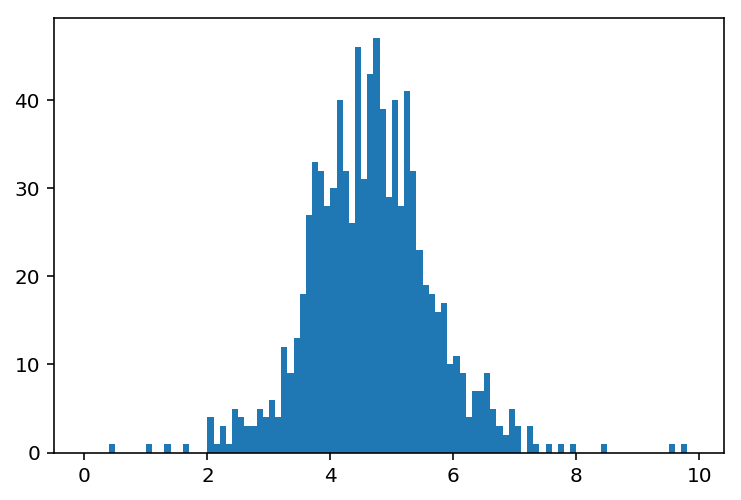

In [119]:
plt.hist(mean_nanot_exp_DA, bins=np.arange(0, 10, 0.1));

In [120]:
bursts_sel = bursts_sel.copy()
bursts_sel['mean_nt_dd'] = mean_nanot_exp_DD
bursts_sel['mean_nt_ad'] = mean_nanot_exp_DA

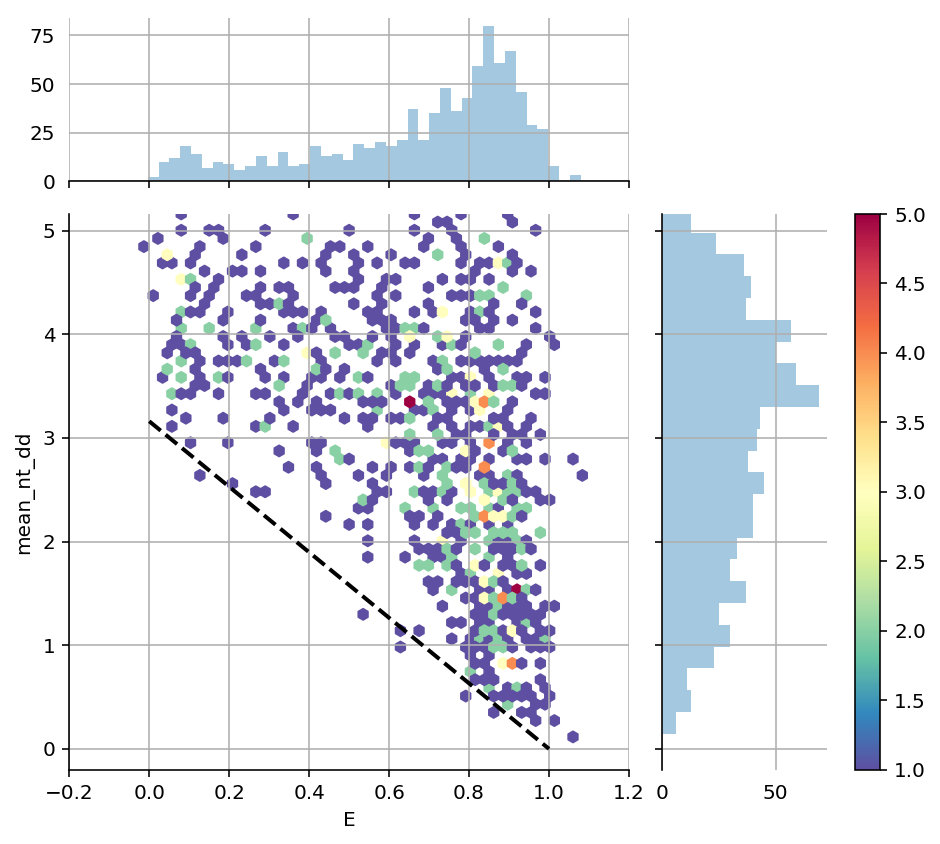

In [121]:
g = sns.JointGrid('E', 'mean_nt_dd', data=bursts_sel, ratio=3, space=0.2,
                  xlim=(-0.2, 1.2), ylim=(-0.2, τ_D_mean + 2))
g.plot_joint(plt.hexbin, mincnt=1, extent=(-0.2, 1.2, -0.2, τ_D_mean + 2),
             cmap='Spectral_r', gridsize=60, )
g.plot_marginals(sns.distplot, color="C0", bins=40, kde=False)
# Colorbar
pos = g.ax_joint.get_position().get_points()
X, Y = pos[:, 0], pos[:, 1]
cax = plt.axes([1., Y[0], (X[1] - X[0]) * 0.045, Y[1] - Y[0]])
# MFD Line
x = np.arange(0, 1.01, 0.01)
y = τ_D_mean * (1 - x)
g.ax_joint.plot(x, y, '--k', lw=2)
g.ax_joint.grid(True)
# Plot style
g.ax_marg_x.grid(True); g.ax_marg_y.grid(True); 
plt.setp(g.ax_marg_y.get_xticklabels() + g.ax_marg_x.get_yticklabels(), visible=True);
plt.colorbar(cax=cax);

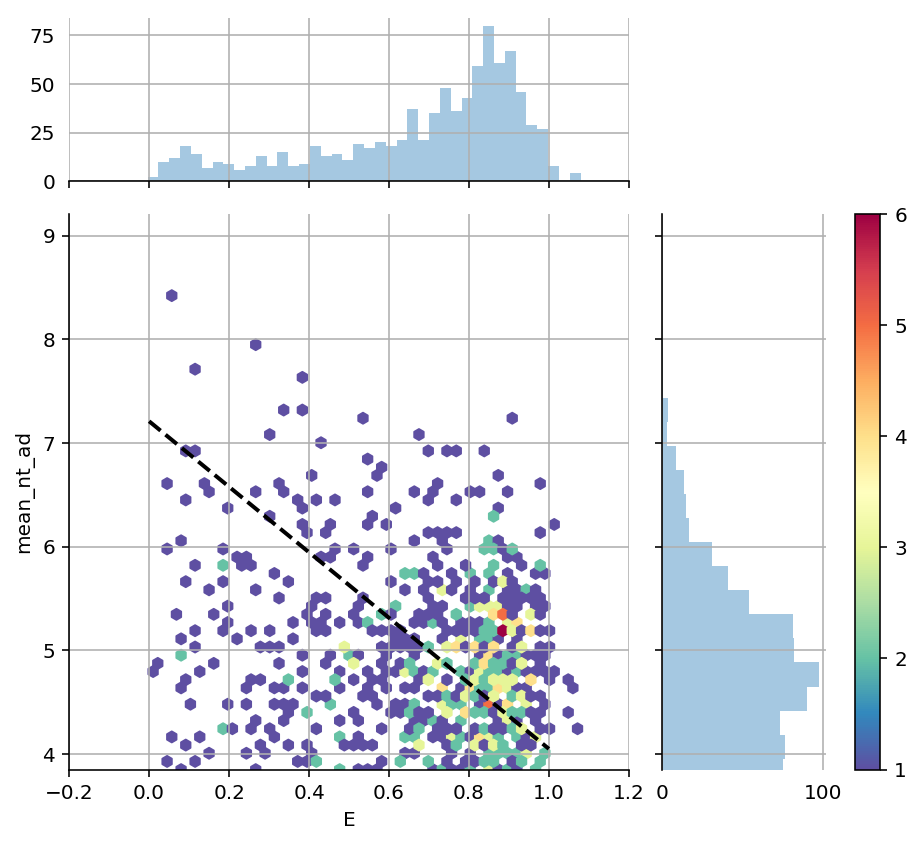

In [122]:
g = sns.JointGrid('E', 'mean_nt_ad', data=bursts_sel, ratio=3, space=0.2,
                  xlim=(-0.2, 1.2), ylim=(τ_A - 0.2, τ_A + τ_D_mean + 2))
g.plot_joint(plt.hexbin, mincnt=1, extent=(-0.2, 1.2, τ_A - 0.2, τ_A + τ_D_mean + 2),
             cmap='Spectral_r', gridsize=60, )
g.plot_marginals(sns.distplot, color="C0", bins=40, kde=False)
# Colorbar
pos = g.ax_joint.get_position().get_points()
X, Y = pos[:, 0], pos[:, 1]
cax = plt.axes([1., Y[0], (X[1] - X[0]) * 0.045, Y[1] - Y[0]])
# MFD Line
x = np.arange(0, 1.01, 0.01)
y = τ_D_mean * (1 - x) + τ_A
g.ax_joint.plot(x, y, '--k', lw=2)
g.ax_joint.grid(True)
# Plot style
g.ax_marg_x.grid(True); g.ax_marg_y.grid(True); 
plt.setp(g.ax_marg_y.get_xticklabels() + g.ax_marg_x.get_yticklabels(), visible=True);
plt.colorbar(cax=cax);

## Experimental BVA

In [123]:
Dex = (burstsph_sel.stream == 'DexDem')|(burstsph_sel.stream ==  'DexAem')
burstsph_sel_Dex = burstsph_sel.loc[Dex]
burstsph_sel_Dex.head()

timestamp  nanotime  stream  repeat      nanot
burst ph                                                
0     0   102993700      1961  DexAem       1  28.784015
      1   103160300      1812  DexDem       1  26.596958
      4   103753500      2048  DexAem       1  30.061021
      6   103802600      2043  DexDem       1  29.987630
      7   103848400      2196  DexAem       1  32.233400

In [124]:
assert bursts_sel.shape[0] == len(Dex.reset_index('burst')['burst'].unique())

In [125]:
n = 5
E_sub_std_exp, E_sub_std_mean_bin_exp, E_centers_exp = depi.bva.bva_bin_combo(
    burstsph_sel_Dex, n, num_sub_bursts_th=500)

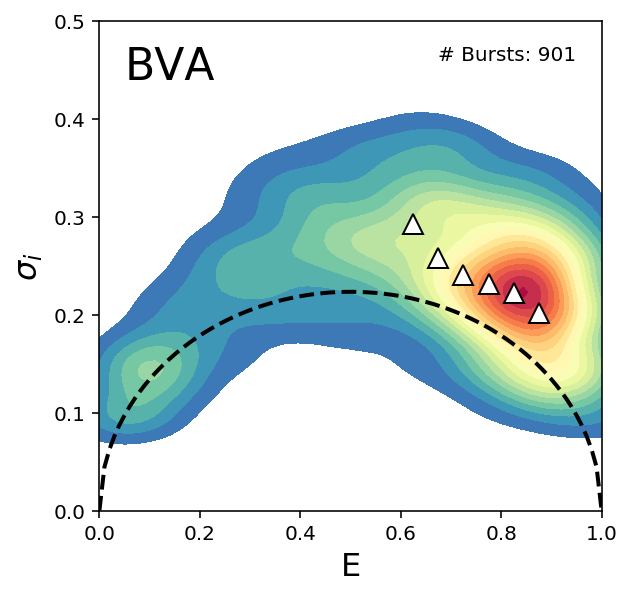

In [126]:
plt.figure(figsize=(4.5, 4.5))
x = np.arange(0,1.01,0.01)
y = np.sqrt((x*(1-x))/n)
plt.plot(x, y, lw=2, color='k', ls='--')
im = sns.kdeplot(bursts_sel.E, E_sub_std_exp, 
                 shade=True, cmap='Spectral_r', shade_lowest=False, n_levels=20)
plt.plot (E_centers_exp, E_sub_std_mean_bin_exp, 
          marker="^", color='white', mew=1, mec='k', lw=0, ms=10, alpha=1)
plt.xlim(0,1)
plt.ylim(0,0.5)#np.sqrt(0.5**2/7)*2)
plt.xlabel('E', fontsize=16)
plt.ylabel(r'$\sigma_i$', fontsize=16);
plt.text(0.05, 0.95, 'BVA', va='top', fontsize=22, transform=plt.gca().transAxes)
plt.text(0.95, 0.95, '# Bursts: %d' % bursts_sel.shape[0], 
         va='top', ha='right', transform=plt.gca().transAxes);

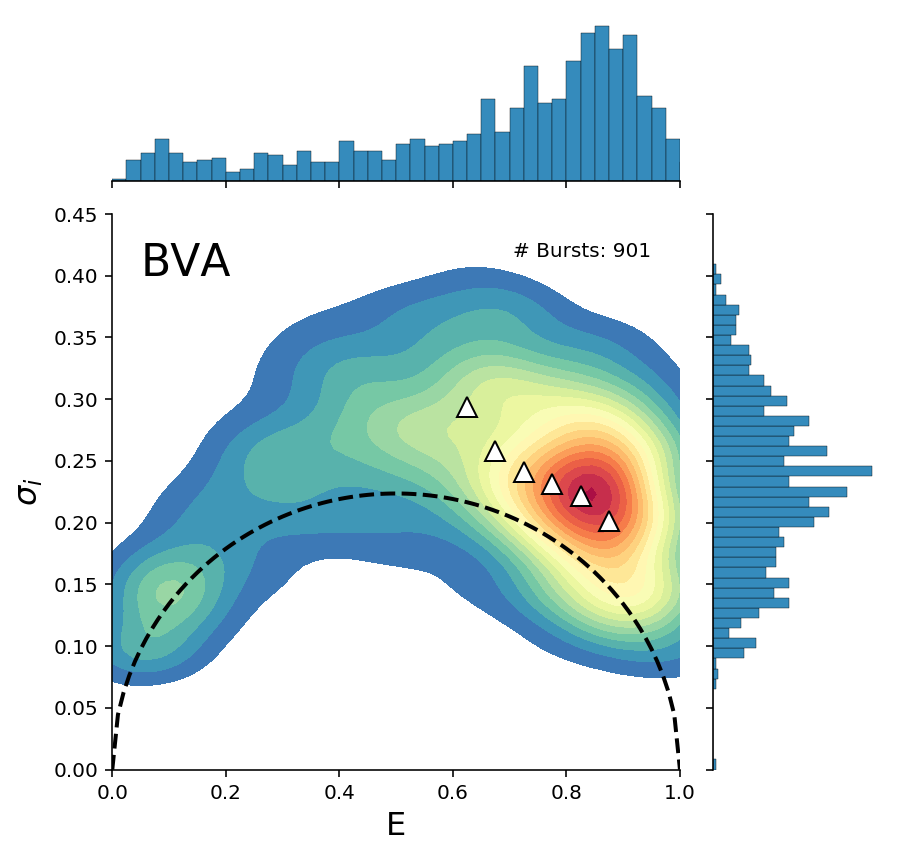

In [127]:
hist_kws = dict(edgecolor='k', linewidth=0.2,
                facecolor=sns.color_palette('Spectral_r', 100)[10])

g = sns.JointGrid(x=bursts_sel.E, y=E_sub_std_exp, ratio=3)
g.plot_joint(sns.kdeplot, cmap='Spectral_r', shade=True, shade_lowest=False, n_levels=20)
g.ax_marg_x.hist(bursts_sel.E, bins=np.arange(-0.2, 1.2, 0.025), **hist_kws)
g.ax_marg_y.hist(E_sub_std_exp, bins=50, orientation="horizontal", **hist_kws)

x1 = np.arange(0,1.01,0.01)
y1 = np.sqrt((x1*(1-x1))/n)
g.ax_joint.plot(x1, y1, lw=2, color='k', ls='--')
g.ax_joint.plot (E_centers_exp, E_sub_std_mean_bin_exp, 
                 marker="^", color='white', mew=1, mec='k', lw=0, ms=10, alpha=1)

g.ax_joint.set_xlim(0,1)
g.ax_joint.set_ylim(0, 0.45)#np.sqrt(0.5**2/7)*2)
g.ax_joint.set_xlabel('E', fontsize=16)
g.ax_joint.set_ylabel(r'$\sigma_i$', fontsize=16);
g.ax_joint.text(0.05, 0.95, 'BVA', va='top', fontsize=22, transform=g.ax_joint.transAxes)
g.ax_joint.text(0.95, 0.95, '# Bursts: %d' % bursts_sel.shape[0], 
         va='top', ha='right', transform=g.ax_joint.transAxes);